# Final Notebook Pt 2.1: Commute, Car Access, Jobs

**By:** Andrew Williams and Ben Brassette
    
**Description:** This notebook is building on earlier queries of means to work. Purpose is to intergrate and commute, car access, and job data. We are tacking points 1, 3, 6, and 7 in this notebook (which will be in 2.2 as well). What still needs to be covered: point 2, spatial statistics, and commentary. 

**Expected Outputs**
* Trimmed data high transit areas--use same tracts for trimmed race/eth and median income data
* Descriptive Statistics: Bar graphs of race/eth and income by using high public transit data
* Side by side maps

**Areas Where We Need More Work**
* Spatial Statistics of means2work
* Overlay of rail stops and bus lines
* Descriptive Statistics of Access to Car
* Inclusion of commute time and access to car maps (by high transit query)
* Descriptive Statistics of Jobs
* Interactive Map using some combination of our datasets

**Notes for self to advance project:**
1. Biggest step forward, intergrating our notebooks in the remaining few weeks in a targeted fashion
2.  Overlay heavy rail and light rail stops
3.  Provide more accurate description of the areas through a spatial join
4. Compare with race/ethnicity and income data; we should create some side by side comparisons of transit use and race/eth and income
5. Query "high" transit tracts, cross reference with income and race/eth, potential to add spatial dimension of LA neighborhoods
6. Availability of cars in households
7. Bring a shaprer focus to Central LA and the San Fernando Valley

**TOC**
* Section 2: Library Imports
* Section 3: Commute
* Section 4: Car Access
* Section 5: Jobs
* Section 6: Spatial Joins Merge
* Section 7: Testing the One File to Rule Them All

# Library Import 


Importing various libaries

In [1]:
import urllib.request, json 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Libraries good to go. 


# Commute Time

Import data and run quick analysis of data.I have already cleaned this data and saved it from another notebook (public_transit_query)

In [2]:
time_m2w = gpd.read_file('Data/time_means2work/acs2019_5yr_B08134_14000US06037185320.geojson')

In [3]:
type(time_m2w)

geopandas.geodataframe.GeoDataFrame

In [4]:
time_m2w.shape

(1005, 243)

In [5]:
time_m2w.head(3)

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,257.0,86.0,74.0,82.0,67.0,115.0,63.0,...,12.0,1.0,2.0,0.0,12.0,0.0,12.0,24.0,35.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,174.0,9.0,16.0,17.0,20.0,39.0,49.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,425.0,280.0,202.0,277.0,127.0,310.0,146.0,...,17.0,16.0,26.0,0.0,17.0,0.0,17.0,30.0,39.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."


In [6]:
time_m2w.tail(3)

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,9.0,7.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1841598.0,6239.0,107784.0,2748.0,170859.0,2908.0,229791.0,3044.0,...,362.0,9712.0,836.0,3427.0,431.0,3700.0,429.0,6317.0,520.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [7]:
time_m2w = time_m2w.drop([1004])

In [8]:
time_m2w.tail(3)

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,9.0,7.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [9]:
time_m2w.columns.to_list()

['geoid',
 'name',
 'B08134001',
 'B08134001, Error',
 'B08134002',
 'B08134002, Error',
 'B08134003',
 'B08134003, Error',
 'B08134004',
 'B08134004, Error',
 'B08134005',
 'B08134005, Error',
 'B08134006',
 'B08134006, Error',
 'B08134007',
 'B08134007, Error',
 'B08134008',
 'B08134008, Error',
 'B08134009',
 'B08134009, Error',
 'B08134010',
 'B08134010, Error',
 'B08134011',
 'B08134011, Error',
 'B08134012',
 'B08134012, Error',
 'B08134013',
 'B08134013, Error',
 'B08134014',
 'B08134014, Error',
 'B08134015',
 'B08134015, Error',
 'B08134016',
 'B08134016, Error',
 'B08134017',
 'B08134017, Error',
 'B08134018',
 'B08134018, Error',
 'B08134019',
 'B08134019, Error',
 'B08134020',
 'B08134020, Error',
 'B08134021',
 'B08134021, Error',
 'B08134022',
 'B08134022, Error',
 'B08134023',
 'B08134023, Error',
 'B08134024',
 'B08134024, Error',
 'B08134025',
 'B08134025, Error',
 'B08134026',
 'B08134026, Error',
 'B08134027',
 'B08134027, Error',
 'B08134028',
 'B08134028, Error',
 

In [10]:
columns_to_keep = ['geoid',
 'name',
 'B08134001',
 'B08134002',
 'B08134003',
 'B08134004',
 'B08134005',
 'B08134006',
 'B08134007',
 'B08134008',
 'B08134009',
 'B08134010',
 'B08134011',
 'B08134012',
 'B08134013',
 'B08134014',
 'B08134015',
 'B08134016',
 'B08134017',
 'B08134018',
 'B08134019',
 'B08134020',
 'B08134021',
 'B08134022',
 'B08134023',
 'B08134024',
 'B08134025',
 'B08134026',
 'B08134027',
 'B08134028',
 'B08134029',
 'B08134030',
 'B08134031',
 'B08134032',
 'B08134033',
 'B08134034',
 'B08134035',
 'B08134036',
 'B08134037',
 'B08134038',
 'B08134039',
 'B08134040',
 'B08134061',
 'B08134062',
 'B08134063',
 'B08134064',
 'B08134065',
 'B08134066',
 'B08134067',
 'B08134068',
 'B08134069',
 'B08134070',
 'B08134071',
 'B08134072',
 'B08134073',
 'B08134074',
 'B08134075',
 'B08134076',
 'B08134077',
 'B08134078',
 'B08134079',
 'B08134080',
 'B08134081',
 'B08134082',
 'B08134083',
 'B08134084',
 'B08134085',
 'B08134086',
 'B08134087',
 'B08134088',
 'B08134089',
 'B08134090',
 'B08134091',
 'B08134092',
 'B08134093', 
 'B08134094',
 'B08134095',
 'B08134096',
 'B08134097',
 'B08134098',
 'B08134099',
 'B08134100',
 'B08134101',
 'B08134102',
 'B08134103',
 'B08134104',
 'B08134105',
 'B08134106',
 'B08134107',
 'B08134108',
 'B08134109',
 'B08134110',
 'geometry']

In [11]:
time_m2w = time_m2w[columns_to_keep]

In [12]:
time_m2w.sample()

,geoid,name,B08134001,B08134002,B08134003,B08134004,B08134005,B08134006,B08134007,B08134008,...,B08134102,B08134103,B08134104,B08134105,B08134106,B08134107,B08134108,B08134109,B08134110,geometry
734,14000US06037231720,"Census Tract 2317.20, Los Angeles, CA",2095.0,42.0,143.0,230.0,255.0,31.0,453.0,204.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.28723 34.01107, -118.2864..."


In [13]:
#renaming columns
time_m2w.columns = ['geoid',
'name',
'Total',   
"t_Less than 10 minutes",
"t_10 to 14 minutes",
"t_15 to 19 minutes",
"t_20 to 24 minutes",
"t_25 to 29 minutes",
"t_30 to 34 minutes",
"t_35 to 44 minutes",
"t_45 to 59 minutes",
"t_60 or more minutes",
"Car, truck, or van",
"c_Less than 10 minutes",
"c_10 to 14 minutes",
"c_15 to 19 minutes",
"c_20 to 24 minutes",
"c_25 to 29 minutes",
"c_30 to 34 minutes",
"c_35 to 44 minutes",
"c_45 to 59 minutes",
"c_60 or more minutes",
"Drove alone",
"da_Less than 10 minutes",
"da_10 to 14 minutes",
"da_15 to 19 minutes",
"da_20 to 24 minutes",
"da_25 to 29 minutes",
"da_30 to 34 minutes",
"da_35 to 44 minutes",
"da_45 to 59 minutes",
"da_60 or more minutes",
"Carpooled",
"cp_Less than 10 minutes",
"cp_10 to 14 minutes",
"cp_15 to 19 minutes",
"cp_20 to 24 minutes",
"cp_25 to 29 minutes",
"cp_30 to 34 minutes",
"cp_35 to 44 minutes",
"cp_45 to 59 minutes",
"cp_60 or more minutes",
"Public transportation",
"pt_Less than 10 minutes",
"pt_10 to 14 minutes",
"pt_15 to 19 minutes",
"pt_20 to 24 minutes",
"pt_25 to 29 minutes",
"pt_30 to 34 minutes",
"pt_35 to 44 minutes",
"pt_45 to 59 minutes",
"pt_60 or more minutes",
"Bus",
"b_Less than 10 minutes",
"b_10 to 14 minutes",
"b_15 to 19 minutes",
"b_20 to 24 minutes",
"b_25 to 29 minutes",
"b_30 to 34 minutes",
"b_35 to 44 minutes",
"b_45 to 59 minutes",
"b_60 or more minutes",
"Subway or elevated rail, Light rail",
"s_Less than 10 minutes",
"s_10 to 14 minutes",
"s_15 to 19 minutes",
"s_20 to 24 minutes",
"s_25 to 29 minutes",
"s_30 to 34 minutes",
"s_35 to 44 minutes",
"s_45 to 59 minutes",
"s_60 or more minutes",
"Long-distance train or commuter rail or Ferryboat",
"ldt_Less than 10 minutes",
"ldt_10 to 14 minutes",
"ldt_15 to 19 minutes",
"ldt_20 to 24 minutes",
"ldt_25 to 29 minutes",
"ldt_30 to 34 minutes",
"ldt_35 to 44 minutes",
"ldt_45 to 59 minutes",
"ldt_60 or more minutes",
"Walked",
"w_Less than 10 minutes",
"w_10 to 14 minutes",
"w_15 to 19 minutes",
"w_20 to 24 minutes",
"w_25 to 29 minutes",
"w_30 to 34 minutes",
"w_35 to 44 minutes",
"w_45 to 59 minutes",
"w_60 or more minutes",
 'geometry']

In [14]:
time_m2w.sample()

,geoid,name,Total,t_Less than 10 minutes,t_10 to 14 minutes,t_15 to 19 minutes,t_20 to 24 minutes,t_25 to 29 minutes,t_30 to 34 minutes,t_35 to 44 minutes,...,w_Less than 10 minutes,w_10 to 14 minutes,w_15 to 19 minutes,w_20 to 24 minutes,w_25 to 29 minutes,w_30 to 34 minutes,w_35 to 44 minutes,w_45 to 59 minutes,w_60 or more minutes,geometry
124,14000US06037117510,"Census Tract 1175.10, Los Angeles, CA",1618.0,65.0,35.0,135.0,292.0,132.0,342.0,93.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.46749 34.23553, -118.4653..."


In [15]:
time_m2w['Percent t_Less than 10 minutes'] = time_m2w['t_Less than 10 minutes']/time_m2w['Total']*100
time_m2w['Percent t_15 to 19 minutes'] = time_m2w['t_15 to 19 minutes']/time_m2w['Total']*100
time_m2w['Percent t_20 to 24 minutes'] = time_m2w['t_20 to 24 minutes']/time_m2w['Total']*100
time_m2w['Percent t_25 to 29 minutes'] = time_m2w['t_25 to 29 minutes']/time_m2w['Total']*100
time_m2w['Percent t_30 to 34 minutes'] = time_m2w['t_30 to 34 minutes']/time_m2w['Total']*100
time_m2w['Percent t_35 to 44 minutes'] = time_m2w['t_35 to 44 minutes']/time_m2w['Total']*100
time_m2w['Percent t_45 to 59 minutes'] = time_m2w['t_45 to 59 minutes']/time_m2w['Total']*100
time_m2w['Percent t_60 or more minutes'] = time_m2w['t_60 or more minutes']/time_m2w['Total']*100
time_m2w['Percent c_Less than 10 minutes'] = time_m2w['c_Less than 10 minutes']/time_m2w['Total']*100
time_m2w['Percent c_15 to 19 minutes'] = time_m2w['c_15 to 19 minutes']/time_m2w['Total']*100
time_m2w['Percent c_20 to 24 minutes'] = time_m2w['c_20 to 24 minutes']/time_m2w['Total']*100
time_m2w['Percent c_25 to 29 minutes'] = time_m2w['c_25 to 29 minutes']/time_m2w['Total']*100
time_m2w['Percent c_30 to 34 minutes'] = time_m2w['c_30 to 34 minutes']/time_m2w['Total']*100
time_m2w['Percent c_35 to 44 minutes'] = time_m2w['c_35 to 44 minutes']/time_m2w['Total']*100
time_m2w['Percent c_45 to 59 minutes'] = time_m2w['c_45 to 59 minutes']/time_m2w['Total']*100
time_m2w['Percent c_60 or more minutes'] = time_m2w['c_60 or more minutes']/time_m2w['Total']*100
time_m2w['Percent pt_Less than 10 minutes'] = time_m2w['pt_Less than 10 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_15 to 19 minutes'] = time_m2w['pt_15 to 19 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_20 to 24 minutes'] = time_m2w['pt_20 to 24 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_25 to 29 minutes'] = time_m2w['pt_25 to 29 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_30 to 34 minutes'] = time_m2w['pt_30 to 34 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_35 to 44 minutes'] = time_m2w['pt_35 to 44 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_45 to 59 minutes'] = time_m2w['pt_45 to 59 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_60 or more minutes'] = time_m2w['pt_60 or more minutes']/time_m2w['Public transportation']*100

**Note that instead of using total as my demoninator for public transt stops, I used the public transit total number in order to get a more accurate read of transit use relative to the proportion of those actually using transit.**

In [16]:
time_m2w.sample()

,geoid,name,Total,t_Less than 10 minutes,t_10 to 14 minutes,t_15 to 19 minutes,t_20 to 24 minutes,t_25 to 29 minutes,t_30 to 34 minutes,t_35 to 44 minutes,...,Percent c_45 to 59 minutes,Percent c_60 or more minutes,Percent pt_Less than 10 minutes,Percent pt_15 to 19 minutes,Percent pt_20 to 24 minutes,Percent pt_25 to 29 minutes,Percent pt_30 to 34 minutes,Percent pt_35 to 44 minutes,Percent pt_45 to 59 minutes,Percent pt_60 or more minutes
107,14000US06037115202,"Census Tract 1152.02, Los Angeles, CA",3556.0,336.0,444.0,494.0,439.0,34.0,571.0,410.0,...,8.802025,11.445444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


# Car Access

Importing data, cleaning it up, and prepping for sjoins.

In [17]:
car_access = gpd.read_file('Data/car_access/acs2019_5yr_B08141_14000US06037208802.geojson')

In [18]:
type(car_access)

geopandas.geodataframe.GeoDataFrame

In [19]:
car_access.shape

(1005, 73)

In [20]:
car_access.head(4)

,geoid,name,B08141001,"B08141001, Error",B08141002,"B08141002, Error",B08141003,"B08141003, Error",B08141004,"B08141004, Error",...,"B08141031, Error",B08141032,"B08141032, Error",B08141033,"B08141033, Error",B08141034,"B08141034, Error",B08141035,"B08141035, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2025.0,253.0,0.0,12.0,550.0,159.0,754.0,190.0,...,52.0,0.0,12.0,32.0,30.0,17.0,20.0,33.0,48.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,8.0,12.0,274.0,122.0,796.0,228.0,...,46.0,0.0,12.0,7.0,12.0,37.0,33.0,33.0,28.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,91.0,67.0,972.0,417.0,1514.0,408.0,...,95.0,0.0,17.0,17.0,26.0,101.0,88.0,11.0,18.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,46.0,46.0,280.0,104.0,740.0,159.0,...,52.0,0.0,12.0,0.0,12.0,36.0,37.0,32.0,38.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [21]:
car_access.tail(4)

,geoid,name,B08141001,"B08141001, Error",B08141002,"B08141002, Error",B08141003,"B08141003, Error",B08141004,"B08141004, Error",...,"B08141031, Error",B08141032,"B08141032, Error",B08141033,"B08141033, Error",B08141034,"B08141034, Error",B08141035,"B08141035, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1949749.0,5583.0,114689.0,3053.0,525463.0,5793.0,726909.0,6480.0,...,2483.0,6529.0,600.0,41273.0,1535.0,48275.0,1669.0,25555.0,1043.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Need top drop the last row

In [22]:
car_access = car_access.drop([1004])

In [23]:
car_access.tail(3)

,geoid,name,B08141001,"B08141001, Error",B08141002,"B08141002, Error",B08141003,"B08141003, Error",B08141004,"B08141004, Error",...,"B08141031, Error",B08141032,"B08141032, Error",B08141033,"B08141033, Error",B08141034,"B08141034, Error",B08141035,"B08141035, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


Drop sucessful

In [24]:
car_access.columns.to_list()

['geoid',
 'name',
 'B08141001',
 'B08141001, Error',
 'B08141002',
 'B08141002, Error',
 'B08141003',
 'B08141003, Error',
 'B08141004',
 'B08141004, Error',
 'B08141005',
 'B08141005, Error',
 'B08141006',
 'B08141006, Error',
 'B08141007',
 'B08141007, Error',
 'B08141008',
 'B08141008, Error',
 'B08141009',
 'B08141009, Error',
 'B08141010',
 'B08141010, Error',
 'B08141011',
 'B08141011, Error',
 'B08141012',
 'B08141012, Error',
 'B08141013',
 'B08141013, Error',
 'B08141014',
 'B08141014, Error',
 'B08141015',
 'B08141015, Error',
 'B08141016',
 'B08141016, Error',
 'B08141017',
 'B08141017, Error',
 'B08141018',
 'B08141018, Error',
 'B08141019',
 'B08141019, Error',
 'B08141020',
 'B08141020, Error',
 'B08141021',
 'B08141021, Error',
 'B08141022',
 'B08141022, Error',
 'B08141023',
 'B08141023, Error',
 'B08141024',
 'B08141024, Error',
 'B08141025',
 'B08141025, Error',
 'B08141026',
 'B08141026, Error',
 'B08141027',
 'B08141027, Error',
 'B08141028',
 'B08141028, Error',
 

Removing error, walking, and other means of transportation columns

In [25]:
# columns to keep
col_to_keep = ['geoid',
 'name',
 'B08141001',
 'B08141002',
 'B08141003',
 'B08141004',
 'B08141005',
 'B08141006',
 'B08141007',
 'B08141008',
 'B08141009',
 'B08141010',
 'B08141011',
 'B08141012',
 'B08141013',
 'B08141014',
 'B08141015',
 'B08141016',
 'B08141017',
 'B08141018',
 'B08141019',
 'B08141020',
 'B08141031',
 'B08141032',
 'B08141033',
 'B08141034',
 'B08141035',
 'geometry']

In [26]:
car_access = car_access[col_to_keep]

This removes any variables that we do not need.

In [27]:
car_access.head()

,geoid,name,B08141001,B08141002,B08141003,B08141004,B08141005,B08141006,B08141007,B08141008,...,B08141017,B08141018,B08141019,B08141020,B08141031,B08141032,B08141033,B08141034,B08141035,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2025.0,0.0,550.0,754.0,721.0,1656.0,0.0,407.0,...,0.0,27.0,19.0,13.0,82.0,0.0,32.0,17.0,33.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,8.0,274.0,796.0,756.0,1617.0,0.0,221.0,...,0.0,0.0,9.0,0.0,77.0,0.0,7.0,37.0,33.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,91.0,972.0,1514.0,480.0,2430.0,28.0,749.0,...,0.0,30.0,38.0,0.0,129.0,0.0,17.0,101.0,11.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,46.0,280.0,740.0,527.0,1323.0,7.0,222.0,...,39.0,0.0,0.0,9.0,68.0,0.0,0.0,36.0,32.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,26.0,226.0,700.0,830.0,1457.0,18.0,165.0,...,8.0,0.0,8.0,10.0,218.0,0.0,61.0,148.0,9.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [28]:
car_access.columns = ['geoid',
 'name',
 'Total Pop Car Access',
 'Total No vehicle available',
 'Total 1 vehicle available',
 'Total 2 vehicles available',
 'Total 3 or more vehicles available',
 'Car Drove Alone',
 'CA No vehicle available',
 'CA 1 vehicle available',
 'CA 2 vehicles available',
 'CA 3 or more vehicles available',
 'Car Carpool',
 'CP No vehicle available',
 'CP 1 vehicle available',
 'CP 2 vehicles available',
 'CP 3 or more vehicles available',
 'Public transportation',
 'PT No vehicle available',
 'PT 1 vehicle available',
 'PT 2 vehicles available',
 'PT 3 or more vehicles available',
 'Worked from home',
 'WH No vehicle available',
 'WH 1 vehicle available',
 'WH 2 vehicles available',
 'WH 3 or more vehicles available',
 'geometry']

In [29]:
car_access.head()

,geoid,name,Total Pop Car Access,Total No vehicle available,Total 1 vehicle available,Total 2 vehicles available,Total 3 or more vehicles available,Car Drove Alone,CA No vehicle available,CA 1 vehicle available,...,PT No vehicle available,PT 1 vehicle available,PT 2 vehicles available,PT 3 or more vehicles available,Worked from home,WH No vehicle available,WH 1 vehicle available,WH 2 vehicles available,WH 3 or more vehicles available,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2025.0,0.0,550.0,754.0,721.0,1656.0,0.0,407.0,...,0.0,27.0,19.0,13.0,82.0,0.0,32.0,17.0,33.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,8.0,274.0,796.0,756.0,1617.0,0.0,221.0,...,0.0,0.0,9.0,0.0,77.0,0.0,7.0,37.0,33.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,91.0,972.0,1514.0,480.0,2430.0,28.0,749.0,...,0.0,30.0,38.0,0.0,129.0,0.0,17.0,101.0,11.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,46.0,280.0,740.0,527.0,1323.0,7.0,222.0,...,39.0,0.0,0.0,9.0,68.0,0.0,0.0,36.0,32.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,26.0,226.0,700.0,830.0,1457.0,18.0,165.0,...,8.0,0.0,8.0,10.0,218.0,0.0,61.0,148.0,9.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


See, it worked! Next we create percentage variables.

In [30]:
car_access['%Total No vehicle available']=round(((car_access['Total No vehicle available']/ car_access['Total Pop Car Access'])*100),2)
car_access['%Total 1 vehicle available']=round(((car_access['Total 1 vehicle available']/ car_access['Total Pop Car Access'])*100),2)
car_access['%Total 2 vehicles available']=round(((car_access['Total 2 vehicles available']/ car_access['Total Pop Car Access'])*100),2)
car_access['%Total 3 or more vehicles available']=round(((car_access['Total 3 or more vehicles available']/ car_access['Total Pop Car Access'])*100),2)
car_access['%PT No vehicle available']=round(((car_access['PT No vehicle available']/ car_access['Total Pop Car Access'])*100),2)
car_access['%PT 1 vehicle available']=round(((car_access['PT 1 vehicle available']/ car_access['Total Pop Car Access'])*100),2)
car_access['%PT 2 vehicles available']=round(((car_access['PT 2 vehicles available']/ car_access['Total Pop Car Access'])*100),2)
car_access['%PT 3 or more vehicles available']=round(((car_access['PT 3 or more vehicles available']/ car_access['Total Pop Car Access'])*100),2)

In [31]:
car_access.head(3)

,geoid,name,Total Pop Car Access,Total No vehicle available,Total 1 vehicle available,Total 2 vehicles available,Total 3 or more vehicles available,Car Drove Alone,CA No vehicle available,CA 1 vehicle available,...,WH 3 or more vehicles available,geometry,%Total No vehicle available,%Total 1 vehicle available,%Total 2 vehicles available,%Total 3 or more vehicles available,%PT No vehicle available,%PT 1 vehicle available,%PT 2 vehicles available,%PT 3 or more vehicles available
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2025.0,0.0,550.0,754.0,721.0,1656.0,0.0,407.0,...,33.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",0.00,27.16,37.23,35.60,0.0,1.33,0.94,0.64
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,8.0,274.0,796.0,756.0,1617.0,0.0,221.0,...,33.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",0.44,14.94,43.40,41.22,0.0,0.00,0.49,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,91.0,972.0,1514.0,480.0,2430.0,28.0,749.0,...,11.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",2.98,31.80,49.53,15.70,0.0,0.98,1.24,0.00


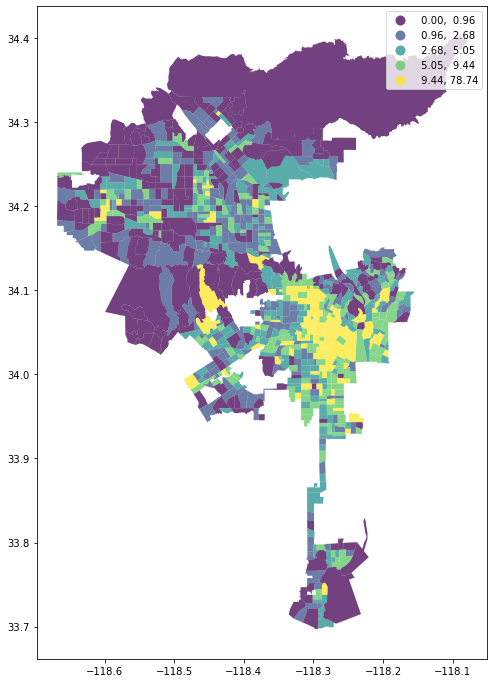

In [32]:
car_access.plot(figsize=(15, 12),
            column='%Total No vehicle available', 
            cmap='viridis', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            legend=True,)

Central and South LA are the biggest areas without car acces. I would like to query this further in and analyze for our chosen neighborhoods. I will also need adjust bin sizes.

# Employment Tye LA

In [33]:
jobs_m2w = gpd.read_file('Data/jobs/acs2019_5yr_B08126_14000US06037208802.geojson')

In [34]:
type(jobs_m2w)

geopandas.geodataframe.GeoDataFrame

In [35]:
jobs_m2w.shape

(1005, 213)

In [36]:
jobs_m2w.tail(3)

,geoid,name,B08126001,"B08126001, Error",B08126002,"B08126002, Error",B08126003,"B08126003, Error",B08126004,"B08126004, Error",...,"B08126101, Error",B08126102,"B08126102, Error",B08126103,"B08126103, Error",B08126104,"B08126104, Error",B08126105,"B08126105, Error",geometry
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1964868.0,5629.0,7696.0,583.0,122743.0,2435.0,152032.0,3075.0,...,992.0,14690.0,853.0,7247.0,648.0,4102.0,473.0,57.0,57.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Need to drop last column

In [37]:
jobs_m2w = jobs_m2w.drop([1004])

In [38]:
jobs_m2w.tail()

,geoid,name,B08126001,"B08126001, Error",B08126002,"B08126002, Error",B08126003,"B08126003, Error",B08126004,"B08126004, Error",...,"B08126101, Error",B08126102,"B08126102, Error",B08126103,"B08126103, Error",B08126104,"B08126104, Error",B08126105,"B08126105, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",138.0,69.0,0.0,12.0,11.0,11.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",5.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


Drop successful.

In [39]:
jobs_m2w.columns.to_list()

['geoid',
 'name',
 'B08126001',
 'B08126001, Error',
 'B08126002',
 'B08126002, Error',
 'B08126003',
 'B08126003, Error',
 'B08126004',
 'B08126004, Error',
 'B08126005',
 'B08126005, Error',
 'B08126006',
 'B08126006, Error',
 'B08126007',
 'B08126007, Error',
 'B08126008',
 'B08126008, Error',
 'B08126009',
 'B08126009, Error',
 'B08126010',
 'B08126010, Error',
 'B08126011',
 'B08126011, Error',
 'B08126012',
 'B08126012, Error',
 'B08126013',
 'B08126013, Error',
 'B08126014',
 'B08126014, Error',
 'B08126015',
 'B08126015, Error',
 'B08126016',
 'B08126016, Error',
 'B08126017',
 'B08126017, Error',
 'B08126018',
 'B08126018, Error',
 'B08126019',
 'B08126019, Error',
 'B08126020',
 'B08126020, Error',
 'B08126021',
 'B08126021, Error',
 'B08126022',
 'B08126022, Error',
 'B08126023',
 'B08126023, Error',
 'B08126024',
 'B08126024, Error',
 'B08126025',
 'B08126025, Error',
 'B08126026',
 'B08126026, Error',
 'B08126027',
 'B08126027, Error',
 'B08126028',
 'B08126028, Error',
 

I'm deleting my standard deviation or "error" rows and dropping the other means of trasnportaion and walking. Will re-define my variable and test it out. 

In [40]:
columns_to_keep = ['geoid',
 'name',
 'B08126001',
 'B08126002',
 'B08126003',
 'B08126004',
 'B08126005',
 'B08126006',
 'B08126007',
 'B08126008',
 'B08126009',
 'B08126010',
 'B08126011',
 'B08126012',
 'B08126013',
 'B08126014',
 'B08126015',
 'B08126016',
 'B08126017',
 'B08126018',
 'B08126019',
 'B08126020',
 'B08126021',
 'B08126022',
 'B08126023',
 'B08126024',
 'B08126025',
 'B08126026',
 'B08126027',
 'B08126028',
 'B08126029',
 'B08126030',
 'B08126031',
 'B08126032',
 'B08126033',
 'B08126034',
 'B08126035',
 'B08126036',
 'B08126037',
 'B08126038',
 'B08126039',
 'B08126040',
 'B08126041',
 'B08126042',
 'B08126043',
 'B08126044',
 'B08126045',
 'B08126046',
 'B08126047',
 'B08126048',
 'B08126049',
 'B08126050',
 'B08126051',
 'B08126052',
 'B08126053',
 'B08126054',
 'B08126055',
 'B08126056',
 'B08126057',
 'B08126058',
 'B08126059',
 'B08126060',
 'B08126091',
 'B08126092',
 'B08126093',
 'B08126094',
 'B08126095',
 'B08126096',
 'B08126097',
 'B08126098',
 'B08126099',
 'B08126100',
 'B08126101',
 'B08126102',
 'B08126103',
 'B08126104',
 'B08126105',
 'geometry']

In [41]:
jobs_m2w = jobs_m2w [columns_to_keep]

In [42]:
jobs_m2w.sample(3)

,geoid,name,B08126001,B08126002,B08126003,B08126004,B08126005,B08126006,B08126007,B08126008,...,B08126097,B08126098,B08126099,B08126100,B08126101,B08126102,B08126103,B08126104,B08126105,geometry
411,14000US06037189904,"Census Tract 1899.04, Los Angeles, CA",1738.0,0.0,0.0,43.0,36.0,162.0,51.0,192.0,...,0.0,0.0,0.0,0.0,0.0,52.0,17.0,0.0,0.0,"MULTIPOLYGON (((-118.34895 34.09981, -118.3489..."
844,14000US06037265100,"Census Tract 2651, Los Angeles, CA",1011.0,0.0,6.0,8.0,22.0,55.0,0.0,56.0,...,0.0,0.0,49.0,46.0,21.0,0.0,45.0,0.0,0.0,"MULTIPOLYGON (((-118.43942 34.07825, -118.4379..."
932,14000US06037277100,"Census Tract 2771, Los Angeles, CA",1648.0,0.0,74.0,88.0,24.0,98.0,40.0,112.0,...,6.0,0.0,41.0,40.0,16.0,12.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.38550 33.95993, -118.3854..."


In [43]:
jobs_m2w.columns =['geoid',
 'name',
 'Total',
 'Total Agriculture, forestry, fishing and hunting, and mining',
 'Total Construction',
 'Total Manufacturing',
 'Total Wholesale trade',
 'Total Retail trade',
 'Total Transportation and warehousing, and utilitie',
 'Total Information',
 'Total Finance and insurance, and real estate and rental and leasing',
 'Total Professional, scientific, and management, and administrative and waste management services',
 'Total Educational services, and health care and social assistance',
 'Total Arts, entertainment, and recreation, and accommodation and food services',
 'Total Other services (except public administration)',
 'Total Public administration',
 'Total Armed forces',
 'Car, truck, or van - drove alone',
 'Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 'Car(alone) Construction',
 'Car(alone) Manufacturing',
 'Car(alone) Wholesale trade',
 'Car(alone) Retail trade',
 'Car(alone) Transportation and warehousing, and utilitie',
 'Car(alone) Information',
 'Car(alone) Finance and insurance, and real estate and rental and leasing',
 'Car(alone) Professional, scientific, and management, and administrative and waste management services',
 'Car(alone) Educational services, and health care and social assistance',
 'Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 'Car(alone) Other services (except public administration)',
 'Car(alone) Public administration',
 'Car(alone) Armed forces',
 'Car, truck, or van - carpooled',
 'Car(carpool) Agriculture, forestry, fishing and hunting, and mining',
 'Car(carpool) Construction',
 'Car(carpool) Manufacturing',
 'Car(carpool) Wholesale trade',
 'Car(carpool) Retail trade',
 'Car(carpool) Transportation and warehousing, and utilitie',
 'Car(carpool) Information',
 'Car(carpool) Finance and insurance, and real estate and rental and leasing',
 'Car(carpool) Professional, scientific, and management, and administrative and waste management services',
 'Car(carpool) Educational services, and health care and social assistance',
 'Car(carpool) Arts, entertainment, and recreation, and accommodation and food services',
 'Car(carpool) Other services (except public administration)',
 'Car(carpool) Public administration',
 'Car(carpool) Armed forces',
 'Public transportation',
 'PT Agriculture, forestry, fishing and hunting, and mining',
 'PT Construction',
 'PT Manufacturing',
 'PT Wholesale trade',
 'PT Retail trade',
 'PT Transportation and warehousing, and utilitie',
 'PT Information',
 'PT Finance and insurance, and real estate and rental and leasing',
 'PT Professional, scientific, and management, and administrative and waste management services',
 'PT Educational services, and health care and social assistance',
 'PT Arts, entertainment, and recreation, and accommodation and food services',
 'PT Other services (except public administration)',
 'PT Public administration',
 'PT Armed forces',         
 'Worked from home',
 'From Home Agriculture, forestry, fishing and hunting, and mining',
 'From Home Construction',
 'From Home Manufacturing',
 'From Home Wholesale trade',
 'From Home Retail trade',
 'From Home Transportation and warehousing, and utilitie',
 'From Home Information',
 'From Home Finance and insurance, and real estate and rental and leasing',
 'From Home Professional, scientific, and management, and administrative and waste management services',
 'From Home Educational services, and health care and social assistance',
 'From Home Arts, entertainment, and recreation, and accommodation and food services',
 'From Home Other services (except public administration)',
 'From Home Public administration',
 'From Home Armed forces',         
 'geometry']

In [44]:
jobs_m2w.head(4)

,geoid,name,Total,"Total Agriculture, forestry, fishing and hunting, and mining",Total Construction,Total Manufacturing,Total Wholesale trade,Total Retail trade,"Total Transportation and warehousing, and utilitie",Total Information,...,"From Home Transportation and warehousing, and utilitie",From Home Information,"From Home Finance and insurance, and real estate and rental and leasing","From Home Professional, scientific, and management, and administrative and waste management services","From Home Educational services, and health care and social assistance","From Home Arts, entertainment, and recreation, and accommodation and food services",From Home Other services (except public administration),From Home Public administration,From Home Armed forces,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,34.0,222.0,125.0,66.0,88.0,68.0,96.0,...,0.0,0.0,10.0,10.0,45.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,48.0,233.0,162.0,33.0,177.0,128.0,103.0,...,0.0,7.0,16.0,18.0,0.0,0.0,0.0,12.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,62.0,228.0,123.0,102.0,487.0,215.0,91.0,...,0.0,0.0,51.0,17.0,27.0,0.0,0.0,34.0,0.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,8.0,142.0,85.0,26.0,245.0,77.0,58.0,...,0.0,21.0,0.0,13.0,23.0,0.0,11.0,0.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [45]:
jobs_m2w['Percent Total Agriculture, forestry, fishing and hunting, and mining'] = jobs_m2w['Total Agriculture, forestry, fishing and hunting, and mining']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Construction'] = jobs_m2w['Total Construction']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Manufacturing'] = jobs_m2w['Total Manufacturing']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Wholesale trade'] = jobs_m2w['Total Wholesale trade']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Retail trade'] = jobs_m2w['Total Retail trade']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Transportation and warehousing, and utilitie'] = jobs_m2w['Total Transportation and warehousing, and utilitie']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Information'] = jobs_m2w['Total Information']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Finance and insurance, and real estate and rental and leasing'] = jobs_m2w['Total Finance and insurance, and real estate and rental and leasing']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Professional, scientific, and management, and administrative and waste management services'] = jobs_m2w['Total Professional, scientific, and management, and administrative and waste management services']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Educational services, and health care and social assistance'] = jobs_m2w['Total Educational services, and health care and social assistance']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Arts, entertainment, and recreation, and accommodation and food services'] = jobs_m2w['Total Arts, entertainment, and recreation, and accommodation and food services']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Other services (except public administration)'] = jobs_m2w['Total Other services (except public administration)']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Public administration'] = jobs_m2w['Total Public administration']/jobs_m2w['Total']*100
jobs_m2w['Percent Total Armed forces'] = jobs_m2w['Total Armed forces']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Agriculture, forestry, fishing and hunting, and mining'] = jobs_m2w['Car(alone) Agriculture, forestry, fishing and hunting, and mining']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Construction'] = jobs_m2w['Car(alone) Construction']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Manufacturing'] = jobs_m2w['Car(alone) Manufacturing']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Wholesale trade'] = jobs_m2w['Car(alone) Wholesale trade']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Retail trade'] = jobs_m2w['Car(alone) Retail trade']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Transportation and warehousing, and utilitie'] = jobs_m2w['Car(alone) Transportation and warehousing, and utilitie']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Information'] = jobs_m2w['Car(alone) Information']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Finance and insurance, and real estate and rental and leasing'] = jobs_m2w['Car(alone) Finance and insurance, and real estate and rental and leasing']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Professional, scientific, and management, and administrative and waste management services'] = jobs_m2w['Car(alone) Professional, scientific, and management, and administrative and waste management services']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Educational services, and health care and social assistance'] = jobs_m2w['Car(alone) Educational services, and health care and social assistance']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Arts, entertainment, and recreation, and accommodation and food services'] = jobs_m2w['Car(alone) Arts, entertainment, and recreation, and accommodation and food services']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Other services (except public administration)'] = jobs_m2w['Car(alone) Other services (except public administration)']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Public administration'] = jobs_m2w['Car(alone) Public administration']/jobs_m2w['Total']*100
jobs_m2w['Percent Car(alone) Armed forces'] = jobs_m2w['Car(alone) Armed forces']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Agriculture, forestry, fishing and hunting, and mining'] = jobs_m2w['PT Agriculture, forestry, fishing and hunting, and mining']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Construction'] = jobs_m2w['PT Construction']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Manufacturing'] = jobs_m2w['PT Manufacturing']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Wholesale trade'] = jobs_m2w['PT Wholesale trade']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Retail trade'] = jobs_m2w['PT Retail trade']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Transportation and warehousing, and utilitie'] = jobs_m2w['PT Transportation and warehousing, and utilitie']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Information'] = jobs_m2w['PT Information']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Finance and insurance, and real estate and rental and leasing'] = jobs_m2w['Total Finance and insurance, and real estate and rental and leasing']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Professional, scientific, and management, and administrative and waste management services'] = jobs_m2w['PT Professional, scientific, and management, and administrative and waste management services']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Educational services, and health care and social assistance'] = jobs_m2w['PT Educational services, and health care and social assistance']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Arts, entertainment, and recreation, and accommodation and food services'] = jobs_m2w['PT Arts, entertainment, and recreation, and accommodation and food services']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Other services (except public administration)'] = jobs_m2w['PT Other services (except public administration)']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Public administration'] = jobs_m2w['PT Public administration']/jobs_m2w['Total']*100
jobs_m2w['Percent PT Armed forces'] = jobs_m2w['PT Armed forces']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Agriculture, forestry, fishing and hunting, and mining'] = jobs_m2w['From Home Agriculture, forestry, fishing and hunting, and mining']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Construction'] = jobs_m2w['From Home Construction']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Manufacturing'] = jobs_m2w['From Home Manufacturing']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Wholesale trade'] = jobs_m2w['From Home Wholesale trade']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Retail trade'] = jobs_m2w['From Home Retail trade']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Transportation and warehousing, and utilitie'] = jobs_m2w['From Home Transportation and warehousing, and utilitie']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Information'] = jobs_m2w['From Home Information']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Finance and insurance, and real estate and rental and leasing'] = jobs_m2w['From Home Finance and insurance, and real estate and rental and leasing']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Professional, scientific, and management, and administrative and waste management services'] = jobs_m2w['From Home Professional, scientific, and management, and administrative and waste management services']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Educational services, and health care and social assistance'] = jobs_m2w['From Home Educational services, and health care and social assistance']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Arts, entertainment, and recreation, and accommodation and food services'] = jobs_m2w['From Home Arts, entertainment, and recreation, and accommodation and food services']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Other services (except public administration)'] = jobs_m2w['From Home Other services (except public administration)']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Public administration'] = jobs_m2w['From Home Public administration']/jobs_m2w['Total']*100
jobs_m2w['Percent From Home Armed forces'] = jobs_m2w['From Home Armed forces']/jobs_m2w['Total']*100

In [46]:
jobs_m2w.sample(4)

,geoid,name,Total,"Total Agriculture, forestry, fishing and hunting, and mining",Total Construction,Total Manufacturing,Total Wholesale trade,Total Retail trade,"Total Transportation and warehousing, and utilitie",Total Information,...,Percent From Home Retail trade,"Percent From Home Transportation and warehousing, and utilitie",Percent From Home Information,"Percent From Home Finance and insurance, and real estate and rental and leasing","Percent From Home Professional, scientific, and management, and administrative and waste management services","Percent From Home Educational services, and health care and social assistance","Percent From Home Arts, entertainment, and recreation, and accommodation and food services",Percent From Home Other services (except public administration),Percent From Home Public administration,Percent From Home Armed forces
82,14000US06037111301,"Census Tract 1113.01, Los Angeles, CA",3943.0,0.0,102.0,238.0,106.0,642.0,329.0,54.0,...,0.000000,0.000000,0.000000,0.329698,0.710119,0.456505,0.735481,0.000000,1.217347,0.0
480,14000US06037197420,"Census Tract 1974.20, Los Angeles, CA",1874.0,28.0,108.0,44.0,9.0,182.0,47.0,211.0,...,0.426894,0.800427,1.867663,1.067236,0.960512,1.013874,2.881537,0.000000,0.000000,0.0
682,14000US06037221810,"Census Tract 2218.10, Los Angeles, CA",1116.0,0.0,89.0,113.0,39.0,142.0,50.0,48.0,...,0.000000,0.000000,1.792115,0.716846,0.000000,2.240143,0.000000,0.000000,0.000000,0.0
38,14000US06037106111,"Census Tract 1061.11, Los Angeles, CA",2268.0,12.0,204.0,313.0,60.0,215.0,93.0,120.0,...,0.000000,0.000000,0.000000,0.000000,0.573192,0.749559,1.455026,0.485009,0.440917,0.0


/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


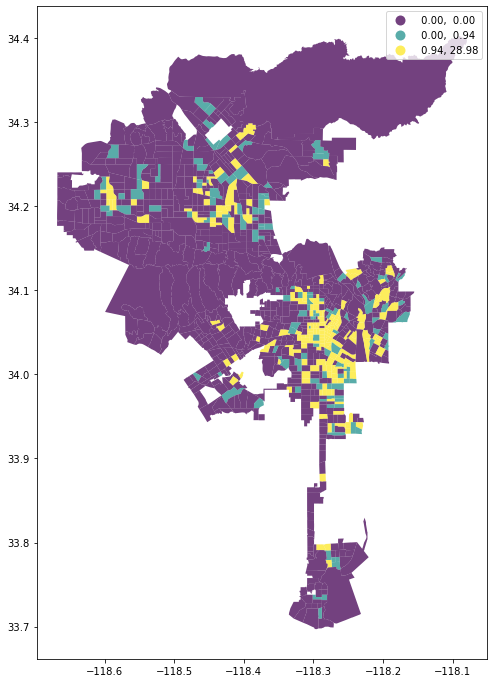

In [47]:
jobs_m2w.plot(figsize=(15, 12),
            column='Percent PT Construction', 
            cmap='viridis', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            legend=True,)

# SJoins

## Means to work and Neighborhood

Importing My previous file with geoids and neigborhoods names and data background check

In [48]:
m2w_income_race= gpd.read_file('m2w_income_race_new.geojson') 

In [49]:
type(m2w_income_race)

geopandas.geodataframe.GeoDataFrame

In [50]:
m2w_income_race.shape

(1004, 37)

In [51]:
m2w_income_race.head(4)

,geoid,name,Neighborho,Median Inc,Total Work,Car Total,Drove alon,Carpooled,Public tra,Bus,...,N_Asian,N_Native H,Hispanic o,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiia,%Hispanic,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,331.0,3.0,1188.0,61.08,0.44,0.07,7.73,0.07,27.74,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,220.0,0.0,147.0,84.64,2.17,0.44,6.46,0.00,4.32,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,486.0,0.0,2616.0,47.05,3.12,0.00,7.66,0.00,41.22,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,341.0,0.0,1364.0,48.95,2.35,0.00,9.21,0.00,36.84,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."


In [52]:
m2w_income_race.columns.to_list()

['geoid',
 'name',
 'Neighborho',
 'Median Inc',
 'Total Work',
 'Car Total',
 'Drove alon',
 'Carpooled',
 'Public tra',
 'Bus',
 'Subway or',
 'Long-dista',
 'Light rail',
 'Worked fro',
 '%Car Total',
 '%Drove alo',
 '%Carpooled',
 '%Public tr',
 '%Bus',
 '%Subway or',
 '%Long-dist',
 '%Light rai',
 '%Worked fr',
 'Total Pop',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native H',
 'Hispanic o',
 '%N_White',
 '%N_Black',
 '%N_Native',
 '%N_Asian',
 '%N_Hawaiia',
 '%Hispanic',
 'geometry']

In [53]:
m2w_income_race.columns=['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'geometry',]

In [54]:
m2w_income_race.sample(4)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,Asian,Pacific Islander,Hispanic or Latino,%White,%Black,%Native,%Asian,%Pacific Islander,%Hispanic or Latino,geometry
858,14000US06037267100,"Census Tract 2671, Los Angeles, CA",West Los Angeles,105284.0,3520.0,2808.0,2568.0,240.0,208.0,208.0,...,1253.0,0.0,432.0,64.39,3.44,0.0,18.84,0.0,6.50,"POLYGON ((-118.43294 34.05154, -118.43152 34.0..."
279,14000US06037134305,"Census Tract 1343.05, Los Angeles, CA",Canoga Park,37606.0,2192.0,1552.0,1186.0,366.0,246.0,235.0,...,361.0,4.0,3473.0,6.22,1.43,0.0,8.63,0.1,83.03,"POLYGON ((-118.60590 34.21966, -118.60162 34.2..."
991,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",Elysian Park,19167.0,32.0,30.0,30.0,0.0,1.0,1.0,...,37.0,0.0,33.0,25.26,1.05,0.0,38.95,0.0,34.74,"POLYGON ((-118.25165 34.08038, -118.25150 34.0..."
36,14000US06037106010,"Census Tract 1060.10, Los Angeles, CA",Sylmar,89946.0,1574.0,1429.0,1230.0,199.0,19.0,19.0,...,118.0,0.0,2227.0,17.78,4.01,0.0,3.82,0.0,72.00,"POLYGON ((-118.45966 34.33002, -118.45894 34.3..."


In [55]:
newgpd1=gpd.sjoin(m2w_income_race,time_m2w,how="inner",op="contains")

In [56]:
type(newgpd1)

geopandas.geodataframe.GeoDataFrame

In [57]:
newgpd1.head(4)

,geoid_left,name_left,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone_left,Carpooled_left,Public transportation_left,Bus_left,...,Percent c_45 to 59 minutes,Percent c_60 or more minutes,Percent pt_Less than 10 minutes,Percent pt_15 to 19 minutes,Percent pt_20 to 24 minutes,Percent pt_25 to 29 minutes,Percent pt_30 to 34 minutes,Percent pt_35 to 44 minutes,Percent pt_45 to 59 minutes,Percent pt_60 or more minutes
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,9.614396,10.591260,0.0,0.000000,0.00,0.000000,16.949153,0.0,0.0,83.050847
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,20.204895,18.212863,0.0,0.000000,0.00,0.000000,0.000000,0.0,100.0,0.000000
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,10.416667,8.265027,0.0,0.000000,0.00,36.764706,0.000000,0.0,0.0,63.235294
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,7.016393,7.081967,0.0,39.583333,18.75,0.000000,0.000000,0.0,0.0,41.666667


In [58]:
newgpd1.columns.to_list()

['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone_left',
 'Carpooled_left',
 'Public transportation_left',
 'Bus_left',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'geometry',
 'index_right',
 'geoid_right',
 'name_right',
 'Total',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10

In [59]:
keep=['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone_left',
 'Carpooled_left',
 'Public transportation_left',
 'Bus_left',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 minutes',
 'c_20 to 24 minutes',
 'c_25 to 29 minutes',
 'c_30 to 34 minutes',
 'c_35 to 44 minutes',
 'c_45 to 59 minutes',
 'c_60 or more minutes',
 'Drove alone_right',
 'da_Less than 10 minutes',
 'da_10 to 14 minutes',
 'da_15 to 19 minutes',
 'da_20 to 24 minutes',
 'da_25 to 29 minutes',
 'da_30 to 34 minutes',
 'da_35 to 44 minutes',
 'da_45 to 59 minutes',
 'da_60 or more minutes',
 'Carpooled_right',
 'cp_Less than 10 minutes',
 'cp_10 to 14 minutes',
 'cp_15 to 19 minutes',
 'cp_20 to 24 minutes',
 'cp_25 to 29 minutes',
 'cp_30 to 34 minutes',
 'cp_35 to 44 minutes',
 'cp_45 to 59 minutes',
 'cp_60 or more minutes',
 'Public transportation_right',
 'pt_Less than 10 minutes',
 'pt_10 to 14 minutes',
 'pt_15 to 19 minutes',
 'pt_20 to 24 minutes',
 'pt_25 to 29 minutes',
 'pt_30 to 34 minutes',
 'pt_35 to 44 minutes',
 'pt_45 to 59 minutes',
 'pt_60 or more minutes',
 'Bus_right',
 'b_Less than 10 minutes',
 'b_10 to 14 minutes',
 'b_15 to 19 minutes',
 'b_20 to 24 minutes',
 'b_25 to 29 minutes',
 'b_30 to 34 minutes',
 'b_35 to 44 minutes',
 'b_45 to 59 minutes',
 'b_60 or more minutes',
 'Subway or elevated rail, Light rail',
 's_Less than 10 minutes',
 's_10 to 14 minutes',
 's_15 to 19 minutes',
 's_20 to 24 minutes',
 's_25 to 29 minutes',
 's_30 to 34 minutes',
 's_35 to 44 minutes',
 's_45 to 59 minutes',
 's_60 or more minutes',
 'Long-distance train or commuter rail or Ferryboat',
 'ldt_Less than 10 minutes',
 'ldt_10 to 14 minutes',
 'ldt_15 to 19 minutes',
 'ldt_20 to 24 minutes',
 'ldt_25 to 29 minutes',
 'ldt_30 to 34 minutes',
 'ldt_35 to 44 minutes',
 'ldt_45 to 59 minutes',
 'ldt_60 or more minutes',
 'Walked',
 'w_Less than 10 minutes',
 'w_10 to 14 minutes',
 'w_15 to 19 minutes',
 'w_20 to 24 minutes',
 'w_25 to 29 minutes',
 'w_30 to 34 minutes',
 'w_35 to 44 minutes',
 'w_45 to 59 minutes',
 'w_60 or more minutes',
 'Percent t_Less than 10 minutes',
 'Percent t_15 to 19 minutes',
 'Percent t_20 to 24 minutes',
 'Percent t_25 to 29 minutes',
 'Percent t_30 to 34 minutes',
 'Percent t_35 to 44 minutes',
 'Percent t_45 to 59 minutes',
 'Percent t_60 or more minutes',
 'Percent c_Less than 10 minutes',
 'Percent c_15 to 19 minutes',
 'Percent c_20 to 24 minutes',
 'Percent c_25 to 29 minutes',
 'Percent c_30 to 34 minutes',
 'Percent c_35 to 44 minutes',
 'Percent c_45 to 59 minutes',
 'Percent c_60 or more minutes',
 'Percent pt_Less than 10 minutes',
 'Percent pt_15 to 19 minutes',
 'Percent pt_20 to 24 minutes',
 'Percent pt_25 to 29 minutes',
 'Percent pt_30 to 34 minutes',
 'Percent pt_35 to 44 minutes',
 'Percent pt_45 to 59 minutes',
 'Percent pt_60 or more minutes',
'geometry',]

In [60]:
newgpd1=newgpd1[keep]
newgpd1.head(4)

,geoid_left,name_left,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone_left,Carpooled_left,Public transportation_left,Bus_left,...,Percent c_60 or more minutes,Percent pt_Less than 10 minutes,Percent pt_15 to 19 minutes,Percent pt_20 to 24 minutes,Percent pt_25 to 29 minutes,Percent pt_30 to 34 minutes,Percent pt_35 to 44 minutes,Percent pt_45 to 59 minutes,Percent pt_60 or more minutes,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,10.591260,0.0,0.000000,0.00,0.000000,16.949153,0.0,0.0,83.050847,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,18.212863,0.0,0.000000,0.00,0.000000,0.000000,0.0,100.0,0.000000,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,8.265027,0.0,0.000000,0.00,36.764706,0.000000,0.0,0.0,63.235294,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,7.081967,0.0,39.583333,18.75,0.000000,0.000000,0.0,0.0,41.666667,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."


In [61]:
newgpd1.columns=['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone_left',
 'Carpooled_left',
 'Public transportation_left',
 'Bus_left',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 minutes',
 'c_20 to 24 minutes',
 'c_25 to 29 minutes',
 'c_30 to 34 minutes',
 'c_35 to 44 minutes',
 'c_45 to 59 minutes',
 'c_60 or more minutes',
 'Drove alone_right',
 'da_Less than 10 minutes',
 'da_10 to 14 minutes',
 'da_15 to 19 minutes',
 'da_20 to 24 minutes',
 'da_25 to 29 minutes',
 'da_30 to 34 minutes',
 'da_35 to 44 minutes',
 'da_45 to 59 minutes',
 'da_60 or more minutes',
 'Carpooled_right',
 'cp_Less than 10 minutes',
 'cp_10 to 14 minutes',
 'cp_15 to 19 minutes',
 'cp_20 to 24 minutes',
 'cp_25 to 29 minutes',
 'cp_30 to 34 minutes',
 'cp_35 to 44 minutes',
 'cp_45 to 59 minutes',
 'cp_60 or more minutes',
 'Public transportation_right',
 'pt_Less than 10 minutes',
 'pt_10 to 14 minutes',
 'pt_15 to 19 minutes',
 'pt_20 to 24 minutes',
 'pt_25 to 29 minutes',
 'pt_30 to 34 minutes',
 'pt_35 to 44 minutes',
 'pt_45 to 59 minutes',
 'pt_60 or more minutes',
 'Bus_right',
 'b_Less than 10 minutes',
 'b_10 to 14 minutes',
 'b_15 to 19 minutes',
 'b_20 to 24 minutes',
 'b_25 to 29 minutes',
 'b_30 to 34 minutes',
 'b_35 to 44 minutes',
 'b_45 to 59 minutes',
 'b_60 or more minutes',
 'Subway or elevated rail, Light rail',
 's_Less than 10 minutes',
 's_10 to 14 minutes',
 's_15 to 19 minutes',
 's_20 to 24 minutes',
 's_25 to 29 minutes',
 's_30 to 34 minutes',
 's_35 to 44 minutes',
 's_45 to 59 minutes',
 's_60 or more minutes',
 'Long-distance train or commuter rail or Ferryboat',
 'ldt_Less than 10 minutes',
 'ldt_10 to 14 minutes',
 'ldt_15 to 19 minutes',
 'ldt_20 to 24 minutes',
 'ldt_25 to 29 minutes',
 'ldt_30 to 34 minutes',
 'ldt_35 to 44 minutes',
 'ldt_45 to 59 minutes',
 'ldt_60 or more minutes',
 'Walked',
 'w_Less than 10 minutes',
 'w_10 to 14 minutes',
 'w_15 to 19 minutes',
 'w_20 to 24 minutes',
 'w_25 to 29 minutes',
 'w_30 to 34 minutes',
 'w_35 to 44 minutes',
 'w_45 to 59 minutes',
 'w_60 or more minutes',
 'Percent t_Less than 10 minutes',
 'Percent t_15 to 19 minutes',
 'Percent t_20 to 24 minutes',
 'Percent t_25 to 29 minutes',
 'Percent t_30 to 34 minutes',
 'Percent t_35 to 44 minutes',
 'Percent t_45 to 59 minutes',
 'Percent t_60 or more minutes',
 'Percent c_Less than 10 minutes',
 'Percent c_15 to 19 minutes',
 'Percent c_20 to 24 minutes',
 'Percent c_25 to 29 minutes',
 'Percent c_30 to 34 minutes',
 'Percent c_35 to 44 minutes',
 'Percent c_45 to 59 minutes',
 'Percent c_60 or more minutes',
 'Percent pt_Less than 10 minutes',
 'Percent pt_15 to 19 minutes',
 'Percent pt_20 to 24 minutes',
 'Percent pt_25 to 29 minutes',
 'Percent pt_30 to 34 minutes',
 'Percent pt_35 to 44 minutes',
 'Percent pt_45 to 59 minutes',
 'Percent pt_60 or more minutes',
'geometry',]

In [62]:
newgpd1.head()

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone_left,Carpooled_left,Public transportation_left,Bus_left,...,Percent c_60 or more minutes,Percent pt_Less than 10 minutes,Percent pt_15 to 19 minutes,Percent pt_20 to 24 minutes,Percent pt_25 to 29 minutes,Percent pt_30 to 34 minutes,Percent pt_35 to 44 minutes,Percent pt_45 to 59 minutes,Percent pt_60 or more minutes,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,10.591260,0.0,0.000000,0.00,0.000000,16.949153,0.0,0.0,83.050847,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,18.212863,0.0,0.000000,0.00,0.000000,0.000000,0.0,100.0,0.000000,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,8.265027,0.0,0.000000,0.00,36.764706,0.000000,0.0,0.0,63.235294,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,7.081967,0.0,39.583333,18.75,0.000000,0.000000,0.0,0.0,41.666667,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",Tujunga,81776.0,1782.0,1538.0,1457.0,81.0,26.0,26.0,...,12.979540,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,100.000000,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


In [63]:
newgpd1.shape

(1004, 151)

## Car Access

Spatial join with car access!

In [64]:
newgpd2=gpd.sjoin(newgpd1,car_access,how="inner",op="contains")

In [65]:
type(newgpd2)

geopandas.geodataframe.GeoDataFrame

In [66]:
newgpd2.head(4)

,geoid_left,name_left,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone_left,Carpooled_left,Public transportation_left,Bus_left,...,WH 2 vehicles available,WH 3 or more vehicles available,%Total No vehicle available,%Total 1 vehicle available,%Total 2 vehicles available,%Total 3 or more vehicles available,%PT No vehicle available,%PT 1 vehicle available,%PT 2 vehicles available,%PT 3 or more vehicles available
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,17.0,33.0,0.00,27.16,37.23,35.60,0.00,1.33,0.94,0.64
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,37.0,33.0,0.44,14.94,43.40,41.22,0.00,0.00,0.49,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,101.0,11.0,2.98,31.80,49.53,15.70,0.00,0.98,1.24,0.00
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,36.0,32.0,2.89,17.58,46.45,33.08,2.45,0.00,0.00,0.56


In [67]:
newgpd2.columns.to_list()

['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone_left',
 'Carpooled_left',
 'Public transportation_left',
 'Bus_left',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home_left',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to

In [68]:
keep2 = ['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone_left',
 'Carpooled_left',
 'Public transportation_left',
 'Bus_left',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home_left',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 minutes',
 'c_20 to 24 minutes',
 'c_25 to 29 minutes',
 'c_30 to 34 minutes',
 'c_35 to 44 minutes',
 'c_45 to 59 minutes',
 'c_60 or more minutes',
 'Drove alone_right',
 'da_Less than 10 minutes',
 'da_10 to 14 minutes',
 'da_15 to 19 minutes',
 'da_20 to 24 minutes',
 'da_25 to 29 minutes',
 'da_30 to 34 minutes',
 'da_35 to 44 minutes',
 'da_45 to 59 minutes',
 'da_60 or more minutes',
 'Carpooled_right',
 'cp_Less than 10 minutes',
 'cp_10 to 14 minutes',
 'cp_15 to 19 minutes',
 'cp_20 to 24 minutes',
 'cp_25 to 29 minutes',
 'cp_30 to 34 minutes',
 'cp_35 to 44 minutes',
 'cp_45 to 59 minutes',
 'cp_60 or more minutes',
 'Public transportation_right',
 'pt_Less than 10 minutes',
 'pt_10 to 14 minutes',
 'pt_15 to 19 minutes',
 'pt_20 to 24 minutes',
 'pt_25 to 29 minutes',
 'pt_30 to 34 minutes',
 'pt_35 to 44 minutes',
 'pt_45 to 59 minutes',
 'pt_60 or more minutes',
 'Bus_right',
 'b_Less than 10 minutes',
 'b_10 to 14 minutes',
 'b_15 to 19 minutes',
 'b_20 to 24 minutes',
 'b_25 to 29 minutes',
 'b_30 to 34 minutes',
 'b_35 to 44 minutes',
 'b_45 to 59 minutes',
 'b_60 or more minutes',
 'Subway or elevated rail, Light rail',
 's_Less than 10 minutes',
 's_10 to 14 minutes',
 's_15 to 19 minutes',
 's_20 to 24 minutes',
 's_25 to 29 minutes',
 's_30 to 34 minutes',
 's_35 to 44 minutes',
 's_45 to 59 minutes',
 's_60 or more minutes',
 'Long-distance train or commuter rail or Ferryboat',
 'ldt_Less than 10 minutes',
 'ldt_10 to 14 minutes',
 'ldt_15 to 19 minutes',
 'ldt_20 to 24 minutes',
 'ldt_25 to 29 minutes',
 'ldt_30 to 34 minutes',
 'ldt_35 to 44 minutes',
 'ldt_45 to 59 minutes',
 'ldt_60 or more minutes',
 'Walked',
 'w_Less than 10 minutes',
 'w_10 to 14 minutes',
 'w_15 to 19 minutes',
 'w_20 to 24 minutes',
 'w_25 to 29 minutes',
 'w_30 to 34 minutes',
 'w_35 to 44 minutes',
 'w_45 to 59 minutes',
 'w_60 or more minutes',
 'Percent t_Less than 10 minutes',
 'Percent t_15 to 19 minutes',
 'Percent t_20 to 24 minutes',
 'Percent t_25 to 29 minutes',
 'Percent t_30 to 34 minutes',
 'Percent t_35 to 44 minutes',
 'Percent t_45 to 59 minutes',
 'Percent t_60 or more minutes',
 'Percent c_Less than 10 minutes',
 'Percent c_15 to 19 minutes',
 'Percent c_20 to 24 minutes',
 'Percent c_25 to 29 minutes',
 'Percent c_30 to 34 minutes',
 'Percent c_35 to 44 minutes',
 'Percent c_45 to 59 minutes',
 'Percent c_60 or more minutes',
 'Percent pt_Less than 10 minutes',
 'Percent pt_15 to 19 minutes',
 'Percent pt_20 to 24 minutes',
 'Percent pt_25 to 29 minutes',
 'Percent pt_30 to 34 minutes',
 'Percent pt_35 to 44 minutes',
 'Percent pt_45 to 59 minutes',
 'Percent pt_60 or more minutes',
 'Total Pop Car Access',
 'Total No vehicle available',
 'Total 1 vehicle available',
 'Total 2 vehicles available',
 'Total 3 or more vehicles available',
 'Car Drove Alone',
 'CA No vehicle available',
 'CA 1 vehicle available',
 'CA 2 vehicles available',
 'CA 3 or more vehicles available',
 'Car Carpool',
 'CP No vehicle available',
 'CP 1 vehicle available',
 'CP 2 vehicles available',
 'CP 3 or more vehicles available',
 'Public transportation',
 'PT No vehicle available',
 'PT 1 vehicle available',
 'PT 2 vehicles available',
 'PT 3 or more vehicles available',
 'Worked from home_right',
 'WH No vehicle available',
 'WH 1 vehicle available',
 'WH 2 vehicles available',
 'WH 3 or more vehicles available',
 '%Total No vehicle available',
 '%Total 1 vehicle available',
 '%Total 2 vehicles available',
 '%Total 3 or more vehicles available',
 '%PT No vehicle available',
 '%PT 1 vehicle available',
 '%PT 2 vehicles available',
 '%PT 3 or more vehicles available',
 'geometry',
]

In [69]:
newgpd2=newgpd2[keep2]

In [70]:
newgpd2.head(4)

,geoid_left,name_left,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone_left,Carpooled_left,Public transportation_left,Bus_left,...,WH 3 or more vehicles available,%Total No vehicle available,%Total 1 vehicle available,%Total 2 vehicles available,%Total 3 or more vehicles available,%PT No vehicle available,%PT 1 vehicle available,%PT 2 vehicles available,%PT 3 or more vehicles available,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,33.0,0.00,27.16,37.23,35.60,0.00,1.33,0.94,0.64,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,33.0,0.44,14.94,43.40,41.22,0.00,0.00,0.49,0.00,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,11.0,2.98,31.80,49.53,15.70,0.00,0.98,1.24,0.00,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,32.0,2.89,17.58,46.45,33.08,2.45,0.00,0.00,0.56,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."


In [71]:
newgpd2.columns=keep2 = ['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled_left',
 'Public transportation',
 'Bus_left',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 minutes',
 'c_20 to 24 minutes',
 'c_25 to 29 minutes',
 'c_30 to 34 minutes',
 'c_35 to 44 minutes',
 'c_45 to 59 minutes',
 'c_60 or more minutes',
 'Drove alone_commmute',
 'da_Less than 10 minutes',
 'da_10 to 14 minutes',
 'da_15 to 19 minutes',
 'da_20 to 24 minutes',
 'da_25 to 29 minutes',
 'da_30 to 34 minutes',
 'da_35 to 44 minutes',
 'da_45 to 59 minutes',
 'da_60 or more minutes',
 'Carpooled_commmute',
 'cp_Less than 10 minutes',
 'cp_10 to 14 minutes',
 'cp_15 to 19 minutes',
 'cp_20 to 24 minutes',
 'cp_25 to 29 minutes',
 'cp_30 to 34 minutes',
 'cp_35 to 44 minutes',
 'cp_45 to 59 minutes',
 'cp_60 or more minutes',
 'Public transportation_commmute',
 'pt_Less than 10 minutes',
 'pt_10 to 14 minutes',
 'pt_15 to 19 minutes',
 'pt_20 to 24 minutes',
 'pt_25 to 29 minutes',
 'pt_30 to 34 minutes',
 'pt_35 to 44 minutes',
 'pt_45 to 59 minutes',
 'pt_60 or more minutes',
 'Bus_commmute',
 'b_Less than 10 minutes',
 'b_10 to 14 minutes',
 'b_15 to 19 minutes',
 'b_20 to 24 minutes',
 'b_25 to 29 minutes',
 'b_30 to 34 minutes',
 'b_35 to 44 minutes',
 'b_45 to 59 minutes',
 'b_60 or more minutes',
 'Subway_commmute',
 's_Less than 10 minutes',
 's_10 to 14 minutes',
 's_15 to 19 minutes',
 's_20 to 24 minutes',
 's_25 to 29 minutes',
 's_30 to 34 minutes',
 's_35 to 44 minutes',
 's_45 to 59 minutes',
 's_60 or more minutes',
 'Long-distance train_commmute',
 'ldt_Less than 10 minutes',
 'ldt_10 to 14 minutes',
 'ldt_15 to 19 minutes',
 'ldt_20 to 24 minutes',
 'ldt_25 to 29 minutes',
 'ldt_30 to 34 minutes',
 'ldt_35 to 44 minutes',
 'ldt_45 to 59 minutes',
 'ldt_60 or more minutes',
 'Walked_commmute',
 'w_Less than 10 minutes',
 'w_10 to 14 minutes',
 'w_15 to 19 minutes',
 'w_20 to 24 minutes',
 'w_25 to 29 minutes',
 'w_30 to 34 minutes',
 'w_35 to 44 minutes',
 'w_45 to 59 minutes',
 'w_60 or more minutes',
 'Percent t_Less than 10 minutes',
 'Percent t_15 to 19 minutes',
 'Percent t_20 to 24 minutes',
 'Percent t_25 to 29 minutes',
 'Percent t_30 to 34 minutes',
 'Percent t_35 to 44 minutes',
 'Percent t_45 to 59 minutes',
 'Percent t_60 or more minutes',
 'Percent c_Less than 10 minutes',
 'Percent c_15 to 19 minutes',
 'Percent c_20 to 24 minutes',
 'Percent c_25 to 29 minutes',
 'Percent c_30 to 34 minutes',
 'Percent c_35 to 44 minutes',
 'Percent c_45 to 59 minutes',
 'Percent c_60 or more minutes',
 'Percent pt_Less than 10 minutes',
 'Percent pt_15 to 19 minutes',
 'Percent pt_20 to 24 minutes',
 'Percent pt_25 to 29 minutes',
 'Percent pt_30 to 34 minutes',
 'Percent pt_35 to 44 minutes',
 'Percent pt_45 to 59 minutes',
 'Percent pt_60 or more minutes',
 'Total Pop Car Access',
 'Total No vehicle available',
 'Total 1 vehicle available',
 'Total 2 vehicles available',
 'Total 3 or more vehicles available',
 'Car Drove Alone_caccess',
 'CA No vehicle available',
 'CA 1 vehicle available',
 'CA 2 vehicles available',
 'CA 3 or more vehicles available',
 'Car Carpool_caccess',
 'CP No vehicle available',
 'CP 1 vehicle available',
 'CP 2 vehicles available',
 'CP 3 or more vehicles available',
 'Public transportation_caccess',
 'PT No vehicle available',
 'PT 1 vehicle available',
 'PT 2 vehicles available',
 'PT 3 or more vehicles available',
 'Worked from home_right_caccess',
 'WH No vehicle available',
 'WH 1 vehicle available',
 'WH 2 vehicles available',
 'WH 3 or more vehicles available',
 '%Total No vehicle available',
 '%Total 1 vehicle available',
 '%Total 2 vehicles available',
 '%Total 3 or more vehicles available',
 '%PT No vehicle available',
 '%PT 1 vehicle available',
 '%PT 2 vehicles available',
 '%PT 3 or more vehicles available',
 'geometry',
]

In [72]:
newgpd2.shape

(1004, 184)

In [73]:
newgpd2.head(4)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled_left,Public transportation,Bus_left,...,WH 3 or more vehicles available,%Total No vehicle available,%Total 1 vehicle available,%Total 2 vehicles available,%Total 3 or more vehicles available,%PT No vehicle available,%PT 1 vehicle available,%PT 2 vehicles available,%PT 3 or more vehicles available,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,33.0,0.00,27.16,37.23,35.60,0.00,1.33,0.94,0.64,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,33.0,0.44,14.94,43.40,41.22,0.00,0.00,0.49,0.00,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,11.0,2.98,31.80,49.53,15.70,0.00,0.98,1.24,0.00,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,32.0,2.89,17.58,46.45,33.08,2.45,0.00,0.00,0.56,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."


New dataset is good to go!

## Jobs

Spatial join with jobs!

In [74]:
master=gpd.sjoin(newgpd2,jobs_m2w,how="inner",op="contains")

In [75]:
type(master)

geopandas.geodataframe.GeoDataFrame

In [76]:
master.head(4)

,geoid_left,name_left,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled_left,Public transportation_left,Bus_left,...,Percent From Home Retail trade,"Percent From Home Transportation and warehousing, and utilitie",Percent From Home Information,"Percent From Home Finance and insurance, and real estate and rental and leasing","Percent From Home Professional, scientific, and management, and administrative and waste management services","Percent From Home Educational services, and health care and social assistance","Percent From Home Arts, entertainment, and recreation, and accommodation and food services",Percent From Home Other services (except public administration),Percent From Home Public administration,Percent From Home Armed forces
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,0.345338,0.0,0.000000,0.493340,0.493340,2.220030,0.0,0.000000,0.000000,0.0
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,0.000000,0.0,0.381679,0.872410,0.981461,0.000000,0.0,0.000000,0.654308,0.0
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,0.000000,0.0,0.000000,1.668302,0.556101,0.883219,0.0,0.000000,1.112202,0.0
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,0.000000,0.0,1.318267,0.000000,0.816070,1.443817,0.0,0.690521,0.000000,0.0


In [77]:
master.shape

(1004, 318)

In [78]:
master.columns.to_list()

['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled_left',
 'Public transportation_left',
 'Bus_left',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home_left',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 m

In [79]:
keep3 = ['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled_left',
 'Public transportation_left',
 'Bus_left',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home_left',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 minutes',
 'c_20 to 24 minutes',
 'c_25 to 29 minutes',
 'c_30 to 34 minutes',
 'c_35 to 44 minutes',
 'c_45 to 59 minutes',
 'c_60 or more minutes',
 'Drove alone_commmute',
 'da_Less than 10 minutes',
 'da_10 to 14 minutes',
 'da_15 to 19 minutes',
 'da_20 to 24 minutes',
 'da_25 to 29 minutes',
 'da_30 to 34 minutes',
 'da_35 to 44 minutes',
 'da_45 to 59 minutes',
 'da_60 or more minutes',
 'Carpooled_commmute',
 'cp_Less than 10 minutes',
 'cp_10 to 14 minutes',
 'cp_15 to 19 minutes',
 'cp_20 to 24 minutes',
 'cp_25 to 29 minutes',
 'cp_30 to 34 minutes',
 'cp_35 to 44 minutes',
 'cp_45 to 59 minutes',
 'cp_60 or more minutes',
 'Public transportation_commmute',
 'pt_Less than 10 minutes',
 'pt_10 to 14 minutes',
 'pt_15 to 19 minutes',
 'pt_20 to 24 minutes',
 'pt_25 to 29 minutes',
 'pt_30 to 34 minutes',
 'pt_35 to 44 minutes',
 'pt_45 to 59 minutes',
 'pt_60 or more minutes',
 'Bus_commmute',
 'b_Less than 10 minutes',
 'b_10 to 14 minutes',
 'b_15 to 19 minutes',
 'b_20 to 24 minutes',
 'b_25 to 29 minutes',
 'b_30 to 34 minutes',
 'b_35 to 44 minutes',
 'b_45 to 59 minutes',
 'b_60 or more minutes',
 'Subway_commmute',
 's_Less than 10 minutes',
 's_10 to 14 minutes',
 's_15 to 19 minutes',
 's_20 to 24 minutes',
 's_25 to 29 minutes',
 's_30 to 34 minutes',
 's_35 to 44 minutes',
 's_45 to 59 minutes',
 's_60 or more minutes',
 'Long-distance train_commmute',
 'ldt_Less than 10 minutes',
 'ldt_10 to 14 minutes',
 'ldt_15 to 19 minutes',
 'ldt_20 to 24 minutes',
 'ldt_25 to 29 minutes',
 'ldt_30 to 34 minutes',
 'ldt_35 to 44 minutes',
 'ldt_45 to 59 minutes',
 'ldt_60 or more minutes',
 'Walked_commmute',
 'w_Less than 10 minutes',
 'w_10 to 14 minutes',
 'w_15 to 19 minutes',
 'w_20 to 24 minutes',
 'w_25 to 29 minutes',
 'w_30 to 34 minutes',
 'w_35 to 44 minutes',
 'w_45 to 59 minutes',
 'w_60 or more minutes',
 'Percent t_Less than 10 minutes',
 'Percent t_15 to 19 minutes',
 'Percent t_20 to 24 minutes',
 'Percent t_25 to 29 minutes',
 'Percent t_30 to 34 minutes',
 'Percent t_35 to 44 minutes',
 'Percent t_45 to 59 minutes',
 'Percent t_60 or more minutes',
 'Percent c_Less than 10 minutes',
 'Percent c_15 to 19 minutes',
 'Percent c_20 to 24 minutes',
 'Percent c_25 to 29 minutes',
 'Percent c_30 to 34 minutes',
 'Percent c_35 to 44 minutes',
 'Percent c_45 to 59 minutes',
 'Percent c_60 or more minutes',
 'Percent pt_Less than 10 minutes',
 'Percent pt_15 to 19 minutes',
 'Percent pt_20 to 24 minutes',
 'Percent pt_25 to 29 minutes',
 'Percent pt_30 to 34 minutes',
 'Percent pt_35 to 44 minutes',
 'Percent pt_45 to 59 minutes',
 'Percent pt_60 or more minutes',
 'Total Pop Car Access',
 'Total No vehicle available',
 'Total 1 vehicle available',
 'Total 2 vehicles available',
 'Total 3 or more vehicles available',
 'Car Drove Alone_caccess',
 'CA No vehicle available',
 'CA 1 vehicle available',
 'CA 2 vehicles available',
 'CA 3 or more vehicles available',
 'Car Carpool_caccess',
 'CP No vehicle available',
 'CP 1 vehicle available',
 'CP 2 vehicles available',
 'CP 3 or more vehicles available',
 'Public transportation_caccess',
 'PT No vehicle available',
 'PT 1 vehicle available',
 'PT 2 vehicles available',
 'PT 3 or more vehicles available',
 'Worked from home_right_caccess',
 'WH No vehicle available',
 'WH 1 vehicle available',
 'WH 2 vehicles available',
 'WH 3 or more vehicles available',
 '%Total No vehicle available',
 '%Total 1 vehicle available',
 '%Total 2 vehicles available',
 '%Total 3 or more vehicles available',
 '%PT No vehicle available',
 '%PT 1 vehicle available',
 '%PT 2 vehicles available',
 '%PT 3 or more vehicles available',
 'Total',
 'Total Agriculture, forestry, fishing and hunting, and mining',
 'Total Construction',
 'Total Manufacturing',
 'Total Wholesale trade',
 'Total Retail trade',
 'Total Transportation and warehousing, and utilitie',
 'Total Information',
 'Total Finance and insurance, and real estate and rental and leasing',
 'Total Professional, scientific, and management, and administrative and waste management services',
 'Total Educational services, and health care and social assistance',
 'Total Arts, entertainment, and recreation, and accommodation and food services',
 'Total Other services (except public administration)',
 'Total Public administration',
 'Total Armed forces',
 'Car, truck, or van - drove alone',
 'Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 'Car(alone) Construction',
 'Car(alone) Manufacturing',
 'Car(alone) Wholesale trade',
 'Car(alone) Retail trade',
 'Car(alone) Transportation and warehousing, and utilitie',
 'Car(alone) Information',
 'Car(alone) Finance and insurance, and real estate and rental and leasing',
 'Car(alone) Professional, scientific, and management, and administrative and waste management services',
 'Car(alone) Educational services, and health care and social assistance',
 'Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 'Car(alone) Other services (except public administration)',
 'Car(alone) Public administration',
 'Car(alone) Armed forces',
 'Car, truck, or van - carpooled',
 'Car(carpool) Agriculture, forestry, fishing and hunting, and mining',
 'Car(carpool) Construction',
 'Car(carpool) Manufacturing',
 'Car(carpool) Wholesale trade',
 'Car(carpool) Retail trade',
 'Car(carpool) Transportation and warehousing, and utilitie',
 'Car(carpool) Information',
 'Car(carpool) Finance and insurance, and real estate and rental and leasing',
 'Car(carpool) Professional, scientific, and management, and administrative and waste management services',
 'Car(carpool) Educational services, and health care and social assistance',
 'Car(carpool) Arts, entertainment, and recreation, and accommodation and food services',
 'Car(carpool) Other services (except public administration)',
 'Car(carpool) Public administration',
 'Car(carpool) Armed forces',
 'Public transportation_right',
 'PT Agriculture, forestry, fishing and hunting, and mining',
 'PT Construction',
 'PT Manufacturing',
 'PT Wholesale trade',
 'PT Retail trade',
 'PT Transportation and warehousing, and utilitie',
 'PT Information',
 'PT Finance and insurance, and real estate and rental and leasing',
 'PT Professional, scientific, and management, and administrative and waste management services',
 'PT Educational services, and health care and social assistance',
 'PT Arts, entertainment, and recreation, and accommodation and food services',
 'PT Other services (except public administration)',
 'PT Public administration',
 'PT Armed forces',
 'Worked from home_right',
 'From Home Agriculture, forestry, fishing and hunting, and mining',
 'From Home Construction',
 'From Home Manufacturing',
 'From Home Wholesale trade',
 'From Home Retail trade',
 'From Home Transportation and warehousing, and utilitie',
 'From Home Information',
 'From Home Finance and insurance, and real estate and rental and leasing',
 'From Home Professional, scientific, and management, and administrative and waste management services',
 'From Home Educational services, and health care and social assistance',
 'From Home Arts, entertainment, and recreation, and accommodation and food services',
 'From Home Other services (except public administration)',
 'From Home Public administration',
 'From Home Armed forces',
 'Percent Total Agriculture, forestry, fishing and hunting, and mining',
 'Percent Total Construction',
 'Percent Total Manufacturing',
 'Percent Total Wholesale trade',
 'Percent Total Retail trade',
 'Percent Total Transportation and warehousing, and utilitie',
 'Percent Total Information',
 'Percent Total Finance and insurance, and real estate and rental and leasing',
 'Percent Total Professional, scientific, and management, and administrative and waste management services',
 'Percent Total Educational services, and health care and social assistance',
 'Percent Total Arts, entertainment, and recreation, and accommodation and food services',
 'Percent Total Other services (except public administration)',
 'Percent Total Public administration',
 'Percent Total Armed forces',
 'Percent Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 'Percent Car(alone) Construction',
 'Percent Car(alone) Manufacturing',
 'Percent Car(alone) Wholesale trade',
 'Percent Car(alone) Retail trade',
 'Percent Car(alone) Transportation and warehousing, and utilitie',
 'Percent Car(alone) Information',
 'Percent Car(alone) Finance and insurance, and real estate and rental and leasing',
 'Percent Car(alone) Professional, scientific, and management, and administrative and waste management services',
 'Percent Car(alone) Educational services, and health care and social assistance',
 'Percent Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 'Percent Car(alone) Other services (except public administration)',
 'Percent Car(alone) Public administration',
 'Percent Car(alone) Armed forces',
 'Percent PT Agriculture, forestry, fishing and hunting, and mining',
 'Percent PT Construction',
 'Percent PT Manufacturing',
 'Percent PT Wholesale trade',
 'Percent PT Retail trade',
 'Percent PT Transportation and warehousing, and utilitie',
 'Percent PT Information',
 'Percent PT Finance and insurance, and real estate and rental and leasing',
 'Percent PT Professional, scientific, and management, and administrative and waste management services',
 'Percent PT Educational services, and health care and social assistance',
 'Percent PT Arts, entertainment, and recreation, and accommodation and food services',
 'Percent PT Other services (except public administration)',
 'Percent PT Public administration',
 'Percent PT Armed forces',
 'Percent From Home Agriculture, forestry, fishing and hunting, and mining',
 'Percent From Home Construction',
 'Percent From Home Manufacturing',
 'Percent From Home Wholesale trade',
 'Percent From Home Retail trade',
 'Percent From Home Transportation and warehousing, and utilitie',
 'Percent From Home Information',
 'Percent From Home Finance and insurance, and real estate and rental and leasing',
 'Percent From Home Professional, scientific, and management, and administrative and waste management services',
 'Percent From Home Educational services, and health care and social assistance',
 'Percent From Home Arts, entertainment, and recreation, and accommodation and food services',
 'Percent From Home Other services (except public administration)',
 'Percent From Home Public administration',
 'Percent From Home Armed forces',
 'geometry',
]

In [80]:
master=master[keep3]
master.head(4)

,geoid_left,name_left,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled_left,Public transportation_left,Bus_left,...,"Percent From Home Transportation and warehousing, and utilitie",Percent From Home Information,"Percent From Home Finance and insurance, and real estate and rental and leasing","Percent From Home Professional, scientific, and management, and administrative and waste management services","Percent From Home Educational services, and health care and social assistance","Percent From Home Arts, entertainment, and recreation, and accommodation and food services",Percent From Home Other services (except public administration),Percent From Home Public administration,Percent From Home Armed forces,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,0.0,0.000000,0.493340,0.493340,2.220030,0.0,0.000000,0.000000,0.0,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,0.0,0.381679,0.872410,0.981461,0.000000,0.0,0.000000,0.654308,0.0,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,0.0,0.000000,1.668302,0.556101,0.883219,0.0,0.000000,1.112202,0.0,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,0.0,1.318267,0.000000,0.816070,1.443817,0.0,0.690521,0.000000,0.0,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."


In [81]:
master.columns= ['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 minutes',
 'c_20 to 24 minutes',
 'c_25 to 29 minutes',
 'c_30 to 34 minutes',
 'c_35 to 44 minutes',
 'c_45 to 59 minutes',
 'c_60 or more minutes',
 'Drove alone_commmute',
 'da_Less than 10 minutes',
 'da_10 to 14 minutes',
 'da_15 to 19 minutes',
 'da_20 to 24 minutes',
 'da_25 to 29 minutes',
 'da_30 to 34 minutes',
 'da_35 to 44 minutes',
 'da_45 to 59 minutes',
 'da_60 or more minutes',
 'Carpooled_commmute',
 'cp_Less than 10 minutes',
 'cp_10 to 14 minutes',
 'cp_15 to 19 minutes',
 'cp_20 to 24 minutes',
 'cp_25 to 29 minutes',
 'cp_30 to 34 minutes',
 'cp_35 to 44 minutes',
 'cp_45 to 59 minutes',
 'cp_60 or more minutes',
 'Public transportation_commmute',
 'pt_Less than 10 minutes',
 'pt_10 to 14 minutes',
 'pt_15 to 19 minutes',
 'pt_20 to 24 minutes',
 'pt_25 to 29 minutes',
 'pt_30 to 34 minutes',
 'pt_35 to 44 minutes',
 'pt_45 to 59 minutes',
 'pt_60 or more minutes',
 'Bus_commmute',
 'b_Less than 10 minutes',
 'b_10 to 14 minutes',
 'b_15 to 19 minutes',
 'b_20 to 24 minutes',
 'b_25 to 29 minutes',
 'b_30 to 34 minutes',
 'b_35 to 44 minutes',
 'b_45 to 59 minutes',
 'b_60 or more minutes',
 'Subway_commmute',
 's_Less than 10 minutes',
 's_10 to 14 minutes',
 's_15 to 19 minutes',
 's_20 to 24 minutes',
 's_25 to 29 minutes',
 's_30 to 34 minutes',
 's_35 to 44 minutes',
 's_45 to 59 minutes',
 's_60 or more minutes',
 'Long-distance train_commmute',
 'ldt_Less than 10 minutes',
 'ldt_10 to 14 minutes',
 'ldt_15 to 19 minutes',
 'ldt_20 to 24 minutes',
 'ldt_25 to 29 minutes',
 'ldt_30 to 34 minutes',
 'ldt_35 to 44 minutes',
 'ldt_45 to 59 minutes',
 'ldt_60 or more minutes',
 'Walked_commmute',
 'w_Less than 10 minutes',
 'w_10 to 14 minutes',
 'w_15 to 19 minutes',
 'w_20 to 24 minutes',
 'w_25 to 29 minutes',
 'w_30 to 34 minutes',
 'w_35 to 44 minutes',
 'w_45 to 59 minutes',
 'w_60 or more minutes',
 'Percent t_Less than 10 minutes',
 'Percent t_15 to 19 minutes',
 'Percent t_20 to 24 minutes',
 'Percent t_25 to 29 minutes',
 'Percent t_30 to 34 minutes',
 'Percent t_35 to 44 minutes',
 'Percent t_45 to 59 minutes',
 'Percent t_60 or more minutes',
 'Percent c_Less than 10 minutes',
 'Percent c_15 to 19 minutes',
 'Percent c_20 to 24 minutes',
 'Percent c_25 to 29 minutes',
 'Percent c_30 to 34 minutes',
 'Percent c_35 to 44 minutes',
 'Percent c_45 to 59 minutes',
 'Percent c_60 or more minutes',
 'Percent pt_Less than 10 minutes',
 'Percent pt_15 to 19 minutes',
 'Percent pt_20 to 24 minutes',
 'Percent pt_25 to 29 minutes',
 'Percent pt_30 to 34 minutes',
 'Percent pt_35 to 44 minutes',
 'Percent pt_45 to 59 minutes',
 'Percent pt_60 or more minutes',
 'Total Pop Car Access',
 'Total No vehicle available',
 'Total 1 vehicle available',
 'Total 2 vehicles available',
 'Total 3 or more vehicles available',
 'Car Drove Alone_caccess',
 'CA No vehicle available',
 'CA 1 vehicle available',
 'CA 2 vehicles available',
 'CA 3 or more vehicles available',
 'Car Carpool_caccess',
 'CP No vehicle available',
 'CP 1 vehicle available',
 'CP 2 vehicles available',
 'CP 3 or more vehicles available',
 'Public transportation_caccess',
 'PT No vehicle available',
 'PT 1 vehicle available',
 'PT 2 vehicles available',
 'PT 3 or more vehicles available',
 'Worked from home_right_caccess',
 'WH No vehicle available',
 'WH 1 vehicle available',
 'WH 2 vehicles available',
 'WH 3 or more vehicles available',
 '%Total No vehicle available',
 '%Total 1 vehicle available',
 '%Total 2 vehicles available',
 '%Total 3 or more vehicles available',
 '%PT No vehicle available',
 '%PT 1 vehicle available',
 '%PT 2 vehicles available',
 '%PT 3 or more vehicles available',
 'Total',
 'Total Agriculture, forestry, fishing and hunting, and mining',
 'Total Construction',
 'Total Manufacturing',
 'Total Wholesale trade',
 'Total Retail trade',
 'Total Transportation and warehousing, and utilitie',
 'Total Information',
 'Total Finance and insurance, and real estate and rental and leasing',
 'Total Professional, scientific, and management, and administrative and waste management services',
 'Total Educational services, and health care and social assistance',
 'Total Arts, entertainment, and recreation, and accommodation and food services',
 'Total Other services (except public administration)',
 'Total Public administration',
 'Total Armed forces',
 'Car, truck, or van - drove alone_jobm2w',
 'Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 'Car(alone) Construction',
 'Car(alone) Manufacturing',
 'Car(alone) Wholesale trade',
 'Car(alone) Retail trade',
 'Car(alone) Transportation and warehousing, and utilitie',
 'Car(alone) Information',
 'Car(alone) Finance and insurance, and real estate and rental and leasing',
 'Car(alone) Professional, scientific, and management, and administrative and waste management services',
 'Car(alone) Educational services, and health care and social assistance',
 'Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 'Car(alone) Other services (except public administration)',
 'Car(alone) Public administration',
 'Car(alone) Armed forces',
 'Car, truck, or van - carpooled',
 'Carpool Agriculture, forestry, fishing and hunting, and mining',
 'Carpool Construction',
 'Carpool Manufacturing',
 'Carpool Wholesale trade',
 'Carpool Retail trade',
 'Carpool Transportation and warehousing, and utilitie',
 'Carpool Information',
 'Carpool Finance and insurance, and real estate and rental and leasing',
 'Carpool Professional, scientific, and management, and administrative and waste management services',
 'Carpool Educational services, and health care and social assistance',
 'Carpool Arts, entertainment, and recreation, and accommodation and food services',
 'Carpool Other services (except public administration)',
 'Carpool Public administration',
 'Carpool Armed forces',
 'Public transportation_jobm2w',
 'PT Agriculture, forestry, fishing and hunting, and mining',
 'PT Construction',
 'PT Manufacturing',
 'PT Wholesale trade',
 'PT Retail trade',
 'PT Transportation and warehousing, and utilitie',
 'PT Information',
 'PT Finance and insurance, and real estate and rental and leasing',
 'PT Professional, scientific, and management, and administrative and waste management services',
 'PT Educational services, and health care and social assistance',
 'PT Arts, entertainment, and recreation, and accommodation and food services',
 'PT Other services (except public administration)',
 'PT Public administration',
 'PT Armed forces',
 'Worked from home_jobm2w',
 'From Home Agriculture, forestry, fishing and hunting, and mining',
 'From Home Construction',
 'From Home Manufacturing',
 'From Home Wholesale trade',
 'From Home Retail trade',
 'From Home Transportation and warehousing, and utilitie',
 'From Home Information',
 'From Home Finance and insurance, and real estate and rental and leasing',
 'From Home Professional, scientific, and management, and administrative and waste management services',
 'From Home Educational services, and health care and social assistance',
 'From Home Arts, entertainment, and recreation, and accommodation and food services',
 'From Home Other services (except public administration)',
 'From Home Public administration',
 'From Home Armed forces',
 '%Total Agriculture, forestry, fishing and hunting, and mining',
 '%Total Construction',
 '%Total Manufacturing',
 '%Total Wholesale trade',
 '%Total Retail trade',
 '%Total Transportation and warehousing, and utilitie',
 '%Total Information',
 '%Total Finance and insurance, and real estate and rental and leasing',
 '%Total Professional, scientific, and management, and administrative and waste management services',
 '%Total Educational services, and health care and social assistance',
 '%Total Arts, entertainment, and recreation, and accommodation and food services',
 '%Total Other services (except public administration)',
 '%Total Public administration',
 '%Total Armed forces',
 '%Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 '%Car(alone) Construction',
 '%Car(alone) Manufacturing',
 '%Car(alone) Wholesale trade',
 '%Car(alone) Retail trade',
 '%Car(alone) Transportation and warehousing, and utilitie',
 '%Car(alone) Information',
 '%Car(alone) Finance and insurance, and real estate and rental and leasing',
 '%Car(alone) Professional, scientific, and management, and administrative and waste management services',
 '%Car(alone) Educational services, and health care and social assistance',
 '%Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 '%Car(alone) Other services (except public administration)',
 '%Car(alone) Public administration',
 '%Car(alone) Armed forces',
 '%PT Agriculture, forestry, fishing and hunting, and mining',
 '%PT Construction',
 '%PT Manufacturing',
 '%PT Wholesale trade',
 '%PT Retail trade',
 '%PT Transportation and warehousing, and utilitie',
 '%PT Information',
 '%PT Finance and insurance, and real estate and rental and leasing',
 '%PT Professional, scientific, and management, and administrative and waste management services',
 '%PT Educational services, and health care and social assistance',
 '%PT Arts, entertainment, and recreation, and accommodation and food services',
 '%PT Other services (except public administration)',
 '%PT Public administration',
 '%PT Armed forces',
 '%From Home Agriculture, forestry, fishing and hunting, and mining',
 '%From Home Construction',
 '%From Home Manufacturing',
 '%From Home Wholesale trade',
 '%From Home Retail trade',
 '%From Home Transportation and warehousing, and utilitie',
 '%From Home Information',
 '%From Home Finance and insurance, and real estate and rental and leasing',
 '%From Home Professional, scientific, and management, and administrative and waste management services',
 '%From Home Educational services, and health care and social assistance',
 '%From Home Arts, entertainment, and recreation, and accommodation and food services',
 '%From Home Other services (except public administration)',
 '%From Home Public administration',
 '%From Home Armed forces',
 'geometry',
]

In [82]:
master.shape

(1004, 315)

In [83]:
master.head(4)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,"%From Home Transportation and warehousing, and utilitie",%From Home Information,"%From Home Finance and insurance, and real estate and rental and leasing","%From Home Professional, scientific, and management, and administrative and waste management services","%From Home Educational services, and health care and social assistance","%From Home Arts, entertainment, and recreation, and accommodation and food services",%From Home Other services (except public administration),%From Home Public administration,%From Home Armed forces,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,0.0,0.000000,0.493340,0.493340,2.220030,0.0,0.000000,0.000000,0.0,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,0.0,0.381679,0.872410,0.981461,0.000000,0.0,0.000000,0.654308,0.0,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,0.0,0.000000,1.668302,0.556101,0.883219,0.0,0.000000,1.112202,0.0,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,0.0,1.318267,0.000000,0.816070,1.443817,0.0,0.690521,0.000000,0.0,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."


Massive dataset, but it's good to go!

# Quick Preview

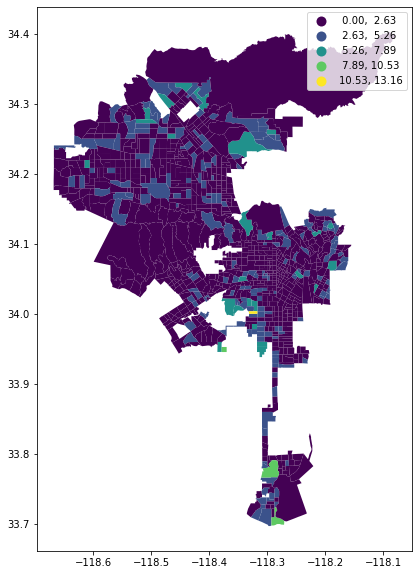

In [84]:
master.plot(figsize=(12,10),
                 column='%Car(alone) Public administration',
                 legend=True, 
                 scheme='equal_interval')   

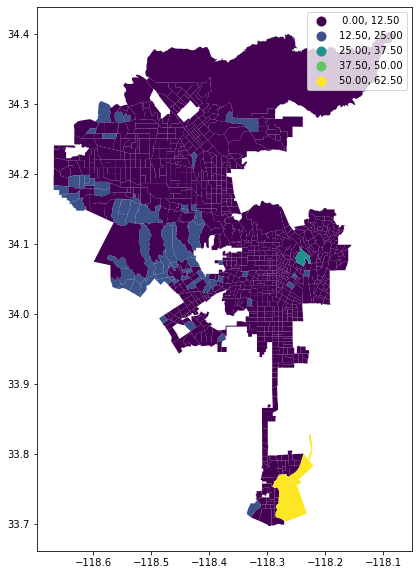

In [85]:
master.plot(figsize=(12,10),
                 column='%Total Finance and insurance, and real estate and rental and leasing',
                 legend=True, 
                 scheme='equal_interval')

All seems to be workign well! As an aside, interesting that one census tract has such a strong concentration of finance and insurance. 

# Uploading File for Later Exploration

## Trimmed Dset

Preparing data for future use.

In [86]:
commute_caraccess_k = ['geoid',
 'name',
 'Neighborhood',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 minutes',
 'c_20 to 24 minutes',
 'c_25 to 29 minutes',
 'c_30 to 34 minutes',
 'c_35 to 44 minutes',
 'c_45 to 59 minutes',
 'c_60 or more minutes',
 'Drove alone_commmute',
 'da_Less than 10 minutes',
 'da_10 to 14 minutes',
 'da_15 to 19 minutes',
 'da_20 to 24 minutes',
 'da_25 to 29 minutes',
 'da_30 to 34 minutes',
 'da_35 to 44 minutes',
 'da_45 to 59 minutes',
 'da_60 or more minutes',
 'Carpooled_commmute',
 'cp_Less than 10 minutes',
 'cp_10 to 14 minutes',
 'cp_15 to 19 minutes',
 'cp_20 to 24 minutes',
 'cp_25 to 29 minutes',
 'cp_30 to 34 minutes',
 'cp_35 to 44 minutes',
 'cp_45 to 59 minutes',
 'cp_60 or more minutes',
 'Public transportation_commmute',
 'pt_Less than 10 minutes',
 'pt_10 to 14 minutes',
 'pt_15 to 19 minutes',
 'pt_20 to 24 minutes',
 'pt_25 to 29 minutes',
 'pt_30 to 34 minutes',
 'pt_35 to 44 minutes',
 'pt_45 to 59 minutes',
 'pt_60 or more minutes',
 'Bus_commmute',
 'b_Less than 10 minutes',
 'b_10 to 14 minutes',
 'b_15 to 19 minutes',
 'b_20 to 24 minutes',
 'b_25 to 29 minutes',
 'b_30 to 34 minutes',
 'b_35 to 44 minutes',
 'b_45 to 59 minutes',
 'b_60 or more minutes',
 'Subway_commmute',
 's_Less than 10 minutes',
 's_10 to 14 minutes',
 's_15 to 19 minutes',
 's_20 to 24 minutes',
 's_25 to 29 minutes',
 's_30 to 34 minutes',
 's_35 to 44 minutes',
 's_45 to 59 minutes',
 's_60 or more minutes',
 'Long-distance train_commmute',
 'ldt_Less than 10 minutes',
 'ldt_10 to 14 minutes',
 'ldt_15 to 19 minutes',
 'ldt_20 to 24 minutes',
 'ldt_25 to 29 minutes',
 'ldt_30 to 34 minutes',
 'ldt_35 to 44 minutes',
 'ldt_45 to 59 minutes',
 'ldt_60 or more minutes',
 'Walked_commmute',
 'w_Less than 10 minutes',
 'w_10 to 14 minutes',
 'w_15 to 19 minutes',
 'w_20 to 24 minutes',
 'w_25 to 29 minutes',
 'w_30 to 34 minutes',
 'w_35 to 44 minutes',
 'w_45 to 59 minutes',
 'w_60 or more minutes',
 'Percent t_Less than 10 minutes',
 'Percent t_15 to 19 minutes',
 'Percent t_20 to 24 minutes',
 'Percent t_25 to 29 minutes',
 'Percent t_30 to 34 minutes',
 'Percent t_35 to 44 minutes',
 'Percent t_45 to 59 minutes',
 'Percent t_60 or more minutes',
 'Percent c_Less than 10 minutes',
 'Percent c_15 to 19 minutes',
 'Percent c_20 to 24 minutes',
 'Percent c_25 to 29 minutes',
 'Percent c_30 to 34 minutes',
 'Percent c_35 to 44 minutes',
 'Percent c_45 to 59 minutes',
 'Percent c_60 or more minutes',
 'Percent pt_Less than 10 minutes',
 'Percent pt_15 to 19 minutes',
 'Percent pt_20 to 24 minutes',
 'Percent pt_25 to 29 minutes',
 'Percent pt_30 to 34 minutes',
 'Percent pt_35 to 44 minutes',
 'Percent pt_45 to 59 minutes',
 'Percent pt_60 or more minutes',
 'Total Pop Car Access',
 'Total No vehicle available',
 'Total 1 vehicle available',
 'Total 2 vehicles available',
 'Total 3 or more vehicles available',
 'Car Drove Alone_caccess',
 'CA No vehicle available',
 'CA 1 vehicle available',
 'CA 2 vehicles available',
 'CA 3 or more vehicles available',
 'Car Carpool_caccess',
 'CP No vehicle available',
 'CP 1 vehicle available',
 'CP 2 vehicles available',
 'CP 3 or more vehicles available',
 'Public transportation_caccess',
 'PT No vehicle available',
 'PT 1 vehicle available',
 'PT 2 vehicles available',
 'PT 3 or more vehicles available',
 'Worked from home_right_caccess',
 'WH No vehicle available',
 'WH 1 vehicle available',
 'WH 2 vehicles available',
 'WH 3 or more vehicles available',
 '%Total No vehicle available',
 '%Total 1 vehicle available',
 '%Total 2 vehicles available',
 '%Total 3 or more vehicles available',
 '%PT No vehicle available',
 '%PT 1 vehicle available',
 '%PT 2 vehicles available',
 '%PT 3 or more vehicles available',
 'geometry',
]
 

In [87]:
m2w_commute_acess = master [commute_caraccess_k]

In [88]:
m2w_commute_acess.head()

,geoid,name,Neighborhood,Total Commute Pop,t_Less than 10 minutes,t_10 to 14 minutes,t_15 to 19 minutes,t_20 to 24 minutes,t_25 to 29 minutes,t_30 to 34 minutes,...,WH 3 or more vehicles available,%Total No vehicle available,%Total 1 vehicle available,%Total 2 vehicles available,%Total 3 or more vehicles available,%PT No vehicle available,%PT 1 vehicle available,%PT 2 vehicles available,%PT 3 or more vehicles available,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,1945.0,86.0,82.0,115.0,409.0,183.0,276.0,...,33.0,0.00,27.16,37.23,35.60,0.00,1.33,0.94,0.64,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,1757.0,9.0,17.0,39.0,161.0,130.0,400.0,...,33.0,0.44,14.94,43.40,41.22,0.00,0.00,0.49,0.00,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,2928.0,280.0,277.0,310.0,449.0,142.0,625.0,...,11.0,2.98,31.80,49.53,15.70,0.00,0.98,1.24,0.00,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,1525.0,58.0,151.0,221.0,245.0,29.0,275.0,...,32.0,2.89,17.58,46.45,33.08,2.45,0.00,0.00,0.56,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",Tujunga,1564.0,57.0,69.0,183.0,289.0,94.0,275.0,...,9.0,1.46,12.68,39.28,46.58,0.45,0.00,0.45,0.56,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


In [89]:
type(m2w_commute_acess)

geopandas.geodataframe.GeoDataFrame

In [90]:
m2w_commute_acess.to_file('m2w_commute_acess.geojson')

<ipython-input-90-9fc499e367e7>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  m2w_commute_acess.to_file('m2w_commute_acess.geojson')


In [91]:
m2w_commute_acess_1=gpd.read_file('m2w_commute_acess.geojson') 

In [92]:
m2w_commute_acess_1.sample(3)

,geoid,name,Neighborho,Total Comm,t_Less tha,t_10 to 14,t_15 to 19,t_20 to 24,t_25 to 29,t_30 to 34,...,WH 3 or mo,%Total No,%Total 1 v,%Total 2 v,%Total 3 o,%PT No veh,%PT 1 vehi,%PT 2 vehi,%PT 3 or m,geometry
750,14000US06037234502,"Census Tract 2345.02, Los Angeles, CA",Hyde Park,1051.0,35.0,28.0,72.0,195.0,68.0,328.0,...,0.0,1.50,34.39,51.54,12.58,0.70,0.44,0.00,0.97,"POLYGON ((-118.33237 34.00345, -118.33236 34.0..."
571,14000US06037209510,"Census Tract 2095.10, Los Angeles, CA",Westlake,1409.0,11.0,124.0,218.0,151.0,34.0,265.0,...,10.0,17.62,51.52,25.59,5.27,12.56,18.50,1.76,0.00,"POLYGON ((-118.28424 34.05584, -118.28410 34.0..."
68,14000US06037109300,"Census Tract 1093, Los Angeles, CA",Granada Hills,1409.0,85.0,61.0,147.0,193.0,85.0,271.0,...,61.0,5.52,9.21,39.52,45.75,0.00,0.65,0.65,2.53,"POLYGON ((-118.48710 34.27014, -118.48707 34.2..."


## Trimmed dset 2

Another dataset to have on hand.

In [93]:
jobs_m2w_income_race_keep= ['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',    
 'Total',
 'Total Agriculture, forestry, fishing and hunting, and mining',
 'Total Construction',
 'Total Manufacturing',
 'Total Wholesale trade',
 'Total Retail trade',
 'Total Transportation and warehousing, and utilitie',
 'Total Information',
 'Total Finance and insurance, and real estate and rental and leasing',
 'Total Professional, scientific, and management, and administrative and waste management services',
 'Total Educational services, and health care and social assistance',
 'Total Arts, entertainment, and recreation, and accommodation and food services',
 'Total Other services (except public administration)',
 'Total Public administration',
 'Total Armed forces',
 'Car, truck, or van - drove alone_jobm2w',
 'Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 'Car(alone) Construction',
 'Car(alone) Manufacturing',
 'Car(alone) Wholesale trade',
 'Car(alone) Retail trade',
 'Car(alone) Transportation and warehousing, and utilitie',
 'Car(alone) Information',
 'Car(alone) Finance and insurance, and real estate and rental and leasing',
 'Car(alone) Professional, scientific, and management, and administrative and waste management services',
 'Car(alone) Educational services, and health care and social assistance',
 'Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 'Car(alone) Other services (except public administration)',
 'Car(alone) Public administration',
 'Car(alone) Armed forces',
 'Car, truck, or van - carpooled',
 'Carpool Agriculture, forestry, fishing and hunting, and mining',
 'Carpool Construction',
 'Carpool Manufacturing',
 'Carpool Wholesale trade',
 'Carpool Retail trade',
 'Carpool Transportation and warehousing, and utilitie',
 'Carpool Information',
 'Carpool Finance and insurance, and real estate and rental and leasing',
 'Carpool Professional, scientific, and management, and administrative and waste management services',
 'Carpool Educational services, and health care and social assistance',
 'Carpool Arts, entertainment, and recreation, and accommodation and food services',
 'Carpool Other services (except public administration)',
 'Carpool Public administration',
 'Carpool Armed forces',
 'Public transportation_jobm2w',
 'PT Agriculture, forestry, fishing and hunting, and mining',
 'PT Construction',
 'PT Manufacturing',
 'PT Wholesale trade',
 'PT Retail trade',
 'PT Transportation and warehousing, and utilitie',
 'PT Information',
 'PT Finance and insurance, and real estate and rental and leasing',
 'PT Professional, scientific, and management, and administrative and waste management services',
 'PT Educational services, and health care and social assistance',
 'PT Arts, entertainment, and recreation, and accommodation and food services',
 'PT Other services (except public administration)',
 'PT Public administration',
 'PT Armed forces',
 'Worked from home_jobm2w',
 'From Home Agriculture, forestry, fishing and hunting, and mining',
 'From Home Construction',
 'From Home Manufacturing',
 'From Home Wholesale trade',
 'From Home Retail trade',
 'From Home Transportation and warehousing, and utilitie',
 'From Home Information',
 'From Home Finance and insurance, and real estate and rental and leasing',
 'From Home Professional, scientific, and management, and administrative and waste management services',
 'From Home Educational services, and health care and social assistance',
 'From Home Arts, entertainment, and recreation, and accommodation and food services',
 'From Home Other services (except public administration)',
 'From Home Public administration',
 'From Home Armed forces',
 '%Total Agriculture, forestry, fishing and hunting, and mining',
 '%Total Construction',
 '%Total Manufacturing',
 '%Total Wholesale trade',
 '%Total Retail trade',
 '%Total Transportation and warehousing, and utilitie',
 '%Total Information',
 '%Total Finance and insurance, and real estate and rental and leasing',
 '%Total Professional, scientific, and management, and administrative and waste management services',
 '%Total Educational services, and health care and social assistance',
 '%Total Arts, entertainment, and recreation, and accommodation and food services',
 '%Total Other services (except public administration)',
 '%Total Public administration',
 '%Total Armed forces',
 '%Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 '%Car(alone) Construction',
 '%Car(alone) Manufacturing',
 '%Car(alone) Wholesale trade',
 '%Car(alone) Retail trade',
 '%Car(alone) Transportation and warehousing, and utilitie',
 '%Car(alone) Information',
 '%Car(alone) Finance and insurance, and real estate and rental and leasing',
 '%Car(alone) Professional, scientific, and management, and administrative and waste management services',
 '%Car(alone) Educational services, and health care and social assistance',
 '%Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 '%Car(alone) Other services (except public administration)',
 '%Car(alone) Public administration',
 '%Car(alone) Armed forces',
 '%PT Agriculture, forestry, fishing and hunting, and mining',
 '%PT Construction',
 '%PT Manufacturing',
 '%PT Wholesale trade',
 '%PT Retail trade',
 '%PT Transportation and warehousing, and utilitie',
 '%PT Information',
 '%PT Finance and insurance, and real estate and rental and leasing',
 '%PT Professional, scientific, and management, and administrative and waste management services',
 '%PT Educational services, and health care and social assistance',
 '%PT Arts, entertainment, and recreation, and accommodation and food services',
 '%PT Other services (except public administration)',
 '%PT Public administration',
 '%PT Armed forces',
 '%From Home Agriculture, forestry, fishing and hunting, and mining',
 '%From Home Construction',
 '%From Home Manufacturing',
 '%From Home Wholesale trade',
 '%From Home Retail trade',
 '%From Home Transportation and warehousing, and utilitie',
 '%From Home Information',
 '%From Home Finance and insurance, and real estate and rental and leasing',
 '%From Home Professional, scientific, and management, and administrative and waste management services',
 '%From Home Educational services, and health care and social assistance',
 '%From Home Arts, entertainment, and recreation, and accommodation and food services',
 '%From Home Other services (except public administration)',
 '%From Home Public administration',
 '%From Home Armed forces',
 'geometry',
]

In [94]:
jobs_m2w_income_race = master [jobs_m2w_income_race_keep]

In [95]:
jobs_m2w_income_race.head(3)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,"%From Home Transportation and warehousing, and utilitie",%From Home Information,"%From Home Finance and insurance, and real estate and rental and leasing","%From Home Professional, scientific, and management, and administrative and waste management services","%From Home Educational services, and health care and social assistance","%From Home Arts, entertainment, and recreation, and accommodation and food services",%From Home Other services (except public administration),%From Home Public administration,%From Home Armed forces,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,0.0,0.000000,0.493340,0.493340,2.220030,0.0,0.0,0.000000,0.0,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,0.0,0.381679,0.872410,0.981461,0.000000,0.0,0.0,0.654308,0.0,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,0.0,0.000000,1.668302,0.556101,0.883219,0.0,0.0,1.112202,0.0,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."


In [96]:
jobs_m2w_income_race.to_file('jobs_m2w_income_race.geojson')

<ipython-input-96-fb9cd88abedf>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  jobs_m2w_income_race.to_file('jobs_m2w_income_race.geojson')


In [97]:
jobs_m2w_income_race_1 = gpd.read_file('jobs_m2w_income_race.geojson') 

In [98]:
jobs_m2w_income_race_1.sample(3)

,geoid,name,Neighborho,Median Inc,Total Work,Car Total,Drove alon,Carpooled,Public tra,Bus,...,%From Ho_5,%From Ho_6,%From Ho_7,%From Ho_8,%From Ho_9,%From Ho10,%From Ho11,%From Ho12,%From Ho13,geometry
48,14000US06037106520,"Census Tract 1065.20, Los Angeles, CA",Sylmar,63924.0,2876.0,2645.0,2123.0,522.0,57.0,48.0,...,0.000000,0.0,0.000000,0.000000,1.251739,0.730181,0.0,0.904033,0.0,"POLYGON ((-118.47301 34.31011, -118.47132 34.3..."
853,14000US06037265510,"Census Tract 2655.10, Los Angeles, CA",Westwood,54847.0,2383.0,1465.0,1279.0,186.0,119.0,119.0,...,1.804448,0.0,0.377675,1.804448,1.216953,0.000000,0.0,0.000000,0.0,"POLYGON ((-118.44772 34.05772, -118.44549 34.0..."
819,14000US06037242300,"Census Tract 2423, Los Angeles, CA",Watts,26515.0,1535.0,1193.0,1100.0,93.0,201.0,132.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,"POLYGON ((-118.24913 33.94427, -118.24911 33.9..."


If I just want to query a portion of our master dataset, I can do without downloading the whole set which is a large amount of data. 

## Master dset

Saving and checking master datasets tne sure they work.

In [99]:
master.to_file('master_new.shp')

<ipython-input-99-678e598f516f>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  master.to_file('master_new.shp')


In [100]:
master_2 = gpd.read_file('master_new.shp') 

In [101]:
master_2.shape

(1004, 315)

In [102]:
type(master_2)

geopandas.geodataframe.GeoDataFrame

In [103]:
master_2.head()

,geoid,name,Neighborho,Median Inc,Total Work,Car Total,Drove alon,Carpooled,Public tra,Bus,...,%From Ho_5,%From Ho_6,%From Ho_7,%From Ho_8,%From Ho_9,%From Ho10,%From Ho11,%From Ho12,%From Ho13,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,0.000000,0.000000,0.493340,0.493340,2.220030,0.000000,0.000000,0.000000,0.0,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,0.000000,0.381679,0.872410,0.981461,0.000000,0.000000,0.000000,0.654308,0.0,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,0.000000,0.000000,1.668302,0.556101,0.883219,0.000000,0.000000,1.112202,0.0,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,0.000000,1.318267,0.000000,0.816070,1.443817,0.000000,0.690521,0.000000,0.0,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",Tujunga,81776.0,1782.0,1538.0,1457.0,81.0,26.0,26.0,...,0.448934,0.561167,0.000000,1.066218,0.953984,1.964085,0.000000,3.367003,0.0,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


In [104]:
master.to_file('master.geojson')

<ipython-input-104-36798a8939c4>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  master.to_file('master.geojson')


In [105]:
master_1 = gpd.read_file('master.geojson') 

In [106]:
master_1

,geoid,name,Neighborho,Median Inc,Total Work,Car Total,Drove alon,Carpooled,Public tra,Bus,...,%From Ho_5,%From Ho_6,%From Ho_7,%From Ho_8,%From Ho_9,%From Ho10,%From Ho11,%From Ho12,%From Ho13,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,0.000000,0.000000,0.493340,0.493340,2.220030,0.000000,0.000000,0.000000,0.0,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,0.000000,0.381679,0.872410,0.981461,0.000000,0.000000,0.000000,0.654308,0.0,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,0.000000,0.000000,1.668302,0.556101,0.883219,0.000000,0.000000,1.112202,0.0,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,0.000000,1.318267,0.000000,0.816070,1.443817,0.000000,0.690521,0.000000,0.0,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",Tujunga,81776.0,1782.0,1538.0,1457.0,81.0,26.0,26.0,...,0.448934,0.561167,0.000000,1.066218,0.953984,1.964085,0.000000,3.367003,0.0,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",Sepulveda Basin,150250.0,138.0,130.0,130.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,"POLYGON ((-118.51849 34.18389, -118.51849 34.1..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",Tujunga,NaN,5.0,5.0,5.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,"POLYGON ((-118.35173 34.28034, -118.35173 34.2..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",Westchester,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.45246 33.94315, -118.44644 33.9..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",San Pedro,NaN,24.0,15.0,15.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,"POLYGON ((-118.29105 33.75378, -118.29050 33.7..."


In [107]:
master_1.shape

(1004, 315)

In [108]:
type(master_1)

geopandas.geodataframe.GeoDataFrame

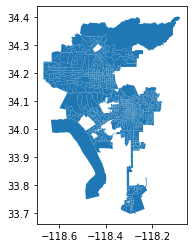

In [109]:
master_1.plot()

All green! Good to go!